# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward non-technical executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a state of your choice.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Reading in sat_2017.csv
sat_2017_df = pd.read_csv('./data/sat_2017.csv')

In [3]:
# Reading in sat_2017.csv
act_2017_df = pd.read_csv('./data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [6]:
sat_2017_df.shape

(51, 5)

In [7]:
act_2017_df.shape

(52, 7)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#### sat_2017_df:
  - 51 rows and 5 columns
  - 51 rows represent the 50 US states and Washington DC
  - the 5 columns represent State, Participation Rates per State, Evidence-Based reading and writing scores   (ERW), Math Scores, the total scores, plus a numeric row index

#### act_2017_df:
  - 52 rows and 7 columns
  - 52 rows represent the 50 US states, Washington DC and the national average
  - the 7 columns represent State,	Participation Rates per State,	English Scores,	Math Scores, Reading Scores,	Science Scores, Composite Scores, plus a numeric row index

#### 4a. Does the data look complete? 

#### sat_2017_df:
  - is missing the column for the national average
  - otherwise all values in the data frame are existing

#### act_2017_df:
  - rows and columns are complete, all values are existing

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

- The columns for the categories in the standadized test are different (SAT: ERW and Math; ACT: English, Math, Reading, Science). That makes it hard to compare the categories. 
- The SAT data set contains a 'Total' column: Sum of the results in the SAT categories; The ACT data set contains a 'Composite' column: Average of the results in the ACT categories.  
- The SAT data set is missing the row for the national averages.
- The automatically generated index column in the data frames is not necessary and the index column should be set to the "State" column.
- The value for the "Composite" column in row 51 "Wyoming" in the ACT data set is compromised.
- For readability the columns should be lower case and snake case.


In [8]:
act_2017_df.tail(2)

,State,Participation,English,Math,Reading,Science,Composite
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


#### What is the minimum possible value for each test/subtest? What is the maximum possible value?

#### In theory:

#### SAT:
  - Lowest possible score total: 400.
  - Math lowest possible score: 200.
  - ERW lowest possible score: 200.
  - Highest possible score total: 1600.
  - Math highest possible score: 800.
  - ERW highest possible score: 800.
  
#### ACT:
 - Lowest score for each subject: 1.
 - Highest score for each subject: 36.
 - Composite is the average of the four subjects.
 - Lowest composite score: 1.
 - Highest composite score: 36.

#### In the data sets:

#### SAT

In [9]:
sat_2017_df.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


  - highest score total: 1295
  - highest score Math: 652
  - highest score ERW: 644
  - lowest score total: 950
  - lowest score math: 52 --> Corrupted value. In original data set the value for Maryland is 524 not 52
  - lowest score ERW: 482

#### ACT

In [10]:
act_2017_df.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


  - highest score math: 25.3
  - highest score reading: 26.0
  - highest score science: 24.9
  - lowest score math: 18.0
  - lowest score reading: 18.1
  - lowest score science: 2.3 --> Corrupted value. In the original data set the value for Maryland is 23.1 not 2.3


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### act_2017_df

In [11]:
# Renaming columns to lower and snake case,
# using build in rename function and a lamda function to make column names in the act data set lower case.
# inplace = True overrights the column names in the existing column.
# code adapted from https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

sat_2017_df.rename(columns = lambda x: x.lower(), inplace = True)

In [12]:
# renaming "evidence-based reading and writing" column to 'erw'
sat_2017_df.rename(columns={'evidence-based reading and writing':'erw'}, inplace=True)

In [13]:
# Set index column to "state" column
sat_2017_df.set_index('state', inplace = True)

In [14]:
sat_2017_df.head(3)

,participation,erw,math,total
state,,,,
Alabama,5%,593,572,1165
Alaska,38%,547,533,1080
Arizona,30%,563,553,1116


In [15]:
sat_2017_df.index = sat_2017_df.index.str.lower()

In [16]:
sat_2017_df.head(3)

,participation,erw,math,total
state,,,,
alabama,5%,593,572,1165
alaska,38%,547,533,1080
arizona,30%,563,553,1116


In [17]:
# Fix compromised value in the 'math' column for 'maryland'.
sat_2017_df.loc['maryland','math'] = 524

#### act_2017_df

In [18]:
# Renaming columns to lower,
# using build in rename function and a lamda function to make column names in the act data set lower case.
# inplace = True overrights the column names in the existing column.
# code adapted from https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
act_2017_df.rename(columns = lambda x: x.lower(), inplace = True)

In [19]:
# Set index column to "state" column
act_2017_df.set_index('state', inplace = True)

In [20]:
# Make values in index column 'state' lower case.
act_2017_df.index = act_2017_df.index.str.lower()

In [21]:
act_2017_df.tail(3)

,participation,english,math,reading,science,composite
state,,,,,,
west virginia,69%,20.0,19.4,21.2,20.5,20.4
wisconsin,100%,19.7,20.4,20.6,20.9,20.5
wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [22]:
# Fix compromised value in the 'composite' column for 'wyoming'.
act_2017_df.loc['wyoming','composite'] = str(20.2)

In [23]:
act_2017_df.loc['maryland','science'] = 23.1

In [24]:
act_2017_df.tail(1)

,participation,english,math,reading,science,composite
state,,,,,,
wyoming,100%,19.4,19.8,20.8,20.6,20.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [25]:
# data types for sat dataset

sat_2017_df.dtypes

participation    object
erw               int64
math              int64
total             int64
dtype: object

In [26]:
# data types for act dataset

act_2017_df.dtypes

participation     object
english          float64
math             float64
reading          float64
science          float64
composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### sat_2017_df:
  - 'participation' is an object. Should be float64.
  
#### act_2017_df:
  - 'participation' and 'composite' are objects. Should be float64.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

#### sat_2017_df:

In [27]:
sat_2017_df['participation'] = sat_2017_df['participation'].map(lambda x: float(x.replace('%',''))/100)

In [28]:
sat_2017_df['participation'].head(3)

state
alabama    0.05
alaska     0.38
arizona    0.30
Name: participation, dtype: float64

#### act_2017_df:

In [29]:
act_2017_df['participation'] = act_2017_df['participation'].map(lambda x: float(x.replace('%',''))/100)

In [30]:
act_2017_df['composite'] = act_2017_df['composite'].map(lambda x: float(x))

In [31]:
act_2017_df['participation'].head(3)

state
national    0.60
alabama     1.00
alaska      0.65
Name: participation, dtype: float64

In [32]:
act_2017_df['composite'].head(3)

state
national    21.0
alabama     19.2
alaska      19.8
Name: composite, dtype: float64

- Fix any individual values preventing other columns from being the appropriate type.

None

- Finish your data modifications by making sure the columns are now typed appropriately.

In [33]:
sat_2017_df['erw'] = sat_2017_df['erw'].astype(int)
sat_2017_df['math'] = sat_2017_df['math'].astype(int)
sat_2017_df['total'] = sat_2017_df['total'].astype(int)

- Display the data types again to confirm they are correct.

In [34]:
sat_2017_df.dtypes

participation    float64
erw                int64
math               int64
total              int64
dtype: object

In [35]:
act_2017_df.dtypes

participation    float64
english          float64
math             float64
reading          float64
science          float64
composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [36]:
# Make list with new column names:

sat_2017_new_column_names = ['sat_2017_participation','sat_2017_erw','sat_2017_math','sat_2017_total']
act_2017_new_column_names = ['act_2017_participation','act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite']


In [37]:
# change df column names to new column names:

sat_2017_df.columns = sat_2017_new_column_names
act_2017_df.columns = act_2017_new_column_names

In [38]:
sat_2017_df.head(3)

,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total
state,,,,
alabama,0.05,593,572,1165
alaska,0.38,547,533,1080
arizona,0.30,563,553,1116


In [39]:
act_2017_df.head(3)

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
state,,,,,,
national,0.60,20.3,20.7,21.4,21.0,21.0
alabama,1.00,18.9,18.4,19.7,19.4,19.2
alaska,0.65,18.7,19.8,20.4,19.9,19.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|ACT/SAT|The 51 States plus Washington DC|
|act_2017_paricipation|float|ACT|The ACT participation rate for each state in 2017 as decimal|
|act_2017_english|float|ACT|The average scores of the ACT's English section for each state|
|act_2017_math|float|ACT|The average scores of the ACT's Math section for each state|
|act_2017_reading|float|ACT|The average scores of the ACT's Reading section for each state|
|act_2017_science|float|ACT|The average scores of the ACT's Science section for each state|
|act_2017_composite|float|ACT|The average scores of the combined ACT sections for each state|
|sat_2017_participation|float|SAT|The SAT participation rate for each state in 2017 as decimal|
|sat_2017_erw|int|SAT|The average score of the SAT's evidence-based Reading & Writing section for each State|
|sat_2017_math|int|SAT|The average score of the SAT's Math section for each State|
|sat_2017_total|int|SAT|The total average score of the SAT for each State|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [40]:
act_2017_df.drop(index = 'national', inplace = True)

In [41]:
act_2017_df.shape

(51, 6)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [42]:
combined_2017_df = pd.concat([act_2017_df, sat_2017_df], axis = 1)

In [43]:
combined_2017_df.head()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total
state,,,,,,,,,,
alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
california,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [45]:
combined_2017_df.to_csv('data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### Importing Data Sets

In [46]:
sat_2018_df = pd.read_csv('./data/sat_2018.csv')

In [47]:
act_2018_df = pd.read_csv('./data/act_2018.csv')

#### Display Data

In [48]:
sat_2018_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [49]:
act_2018_df.head(10)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [50]:
sat_2018_df.shape

(51, 5)

In [51]:
act_2018_df.shape

(52, 3)

In [52]:
sat_2018_df['State'].value_counts().head(1)

Florida    1
Name: State, dtype: int64

In [53]:
# Confirms my observation that the actact_2018_df contains two entries for Maine
act_2018_df['State'].value_counts().head(1)


Maine    2
Name: State, dtype: int64

In [54]:
# Confirming that the second Maine entry is just a duplicate.
act_2018_df[act_2018_df['State']=='Maine']

,State,Participation,Composite
19,Maine,7%,24.0
20,Maine,7%,24.0


#### Discribing Data

#### sat_2018_df:
  - 51 rows and 5 columns
  - 51 rows represent the 50 US states and Washington DC
  - the 5 columns represent State, Participation Rates per State, Evidence-Based reading and writing scores (ERW), Math Scores, the total scores, plus a numeric row index
  - This aligns with sat_2017_df

#### act_2018_df:
  - 52 rows and 3 columns
  - 52 rows represent the 50 US states, Washington DC and a copy of Maine
  - the 3 columns represent State, Participation, Composite Scores, plus a numeric row index
  - the 2018 data does not include there scores for the different categories in the test. This does not align with the 2017 data set.

In [55]:
act_2017_df.head()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
state,,,,,,
alabama,1.00,18.9,18.4,19.7,19.4,19.2
alaska,0.65,18.7,19.8,20.4,19.9,19.8
arizona,0.62,18.6,19.8,20.1,19.8,19.7
arkansas,1.00,18.9,19.0,19.7,19.5,19.4
california,0.31,22.5,22.7,23.1,22.2,22.8


In [56]:
act_2018_df['State'].value_counts()

Maine                   2
Florida                 1
Idaho                   1
Michigan                1
New Mexico              1
Iowa                    1
North Carolina          1
Virginia                1
Nevada                  1
North Dakota            1
Wisconsin               1
Georgia                 1
Oklahoma                1
Massachusetts           1
Tennessee               1
Hawaii                  1
Missouri                1
Utah                    1
Colorado                1
Alabama                 1
South Dakota            1
Arizona                 1
Louisiana               1
Arkansas                1
New Hampshire           1
Connecticut             1
Indiana                 1
Kansas                  1
Ohio                    1
Minnesota               1
New Jersey              1
California              1
New York                1
Texas                   1
Washington              1
West Virginia           1
Montana                 1
Kentucky                1
South Caroli

#### Does the data look complete?

#### Checking for empty cells

In [57]:
#code found here: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
sat_2018_df.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [58]:
act_2018_df.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

Both Data Sets are complete.

#### Are there any obvious issues with the observations?


#### What is the minimum possible value for each test/subtest? What is the maximum possible value?

In theory:
#### SAT:
  - Lowest possible score total: 400.
  - Math lowest possible score: 200.
  - ERW lowest possible score: 200.
  - Highest possible score total: 1600.
  - Math highest possible score: 800.
  - ERW highest possible score: 800.
#### ACT:
  - Lowest score for each subject: 1.
  - Highest score for each subject: 36.
  - Composite is the average of the four subjects.
  - Lowest composite score: 1.
  - Highest composite score: 36.

In [59]:
sat_2018_df.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [60]:
act_2018_df.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [61]:
sat_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [62]:
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


#### sat_2018_df

In [63]:
# Renaming columns to lower and snake case,
# using build in rename function and a lamda function to make column names in the act data set lower case.
# inplace = True overrights the column names in the existing column.
# code adapted from https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

sat_2018_df.rename(columns = lambda x: x.lower(), inplace = True)


sat_2018_df.rename(columns = lambda x: x.replace(' ','_'), inplace = True)


In [64]:
# renaming "evidence-based reading and writing" column to 'erw'
sat_2018_df.rename(columns={'evidence-based_reading_and_writing':'erw'}, inplace=True)

In [65]:
sat_2018_df

,state,participation,erw,math,total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [66]:
# State is going to the index, so every item should be lower case
sat_2018_df['state'] = sat_2018_df['state'].str.lower()


In [67]:
sat_2018_df

,state,participation,erw,math,total
0,alabama,6%,595,571,1166
1,alaska,43%,562,544,1106
2,arizona,29%,577,572,1149
3,arkansas,5%,592,576,1169
4,california,60%,540,536,1076
5,colorado,100%,519,506,1025
6,connecticut,100%,535,519,1053
7,delaware,100%,505,492,998
8,district of columbia,92%,497,480,977
9,florida,56%,550,549,1099


In [68]:
# Set index column to "state" column
sat_2018_df.set_index('state', inplace = True)


In [69]:
sat_2018_df.head()

,participation,erw,math,total
state,,,,
alabama,6%,595,571,1166
alaska,43%,562,544,1106
arizona,29%,577,572,1149
arkansas,5%,592,576,1169
california,60%,540,536,1076


#### act_2018_df

In [70]:
# Renaming columns to lower and snake case,
# using build in rename function and a lamda function to make column names in the act data set lower case.
# inplace = True overrights the column names in the existing column.
# code adapted from https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

act_2018_df.rename(columns = lambda x: x.lower(), inplace = True)

In [71]:
# State is going to the index, so every item should be lower case
act_2018_df['state'] = act_2018_df['state'].str.lower()



In [72]:
act_2018_df.drop_duplicates(['state'], keep='last', inplace = True)

In [73]:
act_2018_df.tail()

,state,participation,composite
47,virginia,24%,23.9
48,washington,24%,22.2
49,west virginia,65%,20.3
50,wisconsin,100%,20.5
51,wyoming,100%,20.0


In [74]:
act_2018_df.set_index('state', inplace = True)

In [75]:
# checking if it worked:

act_2018_df[act_2018_df.index =='maine']

,participation,composite
state,,
maine,7%,24.0


#### Change data type from object to float

#### act_2018_df

In [76]:
act_2018_df.dtypes

participation     object
composite        float64
dtype: object

In [77]:
act_2018_df['composite'] = act_2018_df['composite'].astype(float)

In [78]:
act_2018_df.tail()

,participation,composite
state,,
virginia,24%,23.9
washington,24%,22.2
west virginia,65%,20.3
wisconsin,100%,20.5
wyoming,100%,20.0


In [79]:
act_2018_df['participation'] = act_2018_df['participation'].map(lambda x: float(x.replace('%',''))/100)

In [80]:
act_2018_df.head()

,participation,composite
state,,
alabama,1.00,19.1
alaska,0.33,20.8
arizona,0.66,19.2
arkansas,1.00,19.4
california,0.27,22.7


In [81]:
# Checking data types
act_2018_df.dtypes

participation    float64
composite        float64
dtype: object

#### sat_2018_df

In [82]:
sat_2018_df.head()

,participation,erw,math,total
state,,,,
alabama,6%,595,571,1166
alaska,43%,562,544,1106
arizona,29%,577,572,1149
arkansas,5%,592,576,1169
california,60%,540,536,1076


In [83]:
sat_2018_df['erw'] = sat_2018_df['erw'].astype(int)
sat_2018_df['math'] = sat_2018_df['math'].astype(int)
sat_2018_df['total'] = sat_2018_df['total'].astype(int)

In [84]:
sat_2018_df['participation'] = sat_2018_df['participation'].map(lambda x: float(x.replace('%',''))/100)

In [85]:
sat_2018_df.head()

,participation,erw,math,total
state,,,,
alabama,0.06,595,571,1166
alaska,0.43,562,544,1106
arizona,0.29,577,572,1149
arkansas,0.05,592,576,1169
california,0.60,540,536,1076


In [86]:
# Checking data types
sat_2018_df.dtypes

participation    float64
erw                int64
math               int64
total              int64
dtype: object

#### Rename columns to align them with the combined 2017 data set

In [87]:
# Make list with new column names:

sat_2018_new_column_names = ['sat_2018_participation','sat_2018_erw','sat_2018_math','sat_2018_total']
act_2018_new_column_names = ['act_2018_participation','act_2018_composite']


In [88]:
# change df column names to new column names:

sat_2018_df.columns = sat_2018_new_column_names
act_2018_df.columns = act_2018_new_column_names

In [89]:
act_2018_df.head()

,act_2018_participation,act_2018_composite
state,,
alabama,1.00,19.1
alaska,0.33,20.8
arizona,0.66,19.2
arkansas,1.00,19.4
california,0.27,22.7


In [90]:
sat_2018_df.head()

,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total
state,,,,
alabama,0.06,595,571,1166
alaska,0.43,562,544,1106
arizona,0.29,577,572,1149
arkansas,0.05,592,576,1169
california,0.60,540,536,1076


#### Join 2018 data into one data frame

In [91]:
combined_2018_df = pd.concat([act_2018_df, sat_2018_df], axis = 1, sort = True)

In [92]:
combined_2018_df.shape

(51, 6)

In [93]:
combined_2018_df.head()

,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total
alabama,1.00,19.1,0.06,595,571,1166
alaska,0.33,20.8,0.43,562,544,1106
arizona,0.66,19.2,0.29,577,572,1149
arkansas,1.00,19.4,0.05,592,576,1169
california,0.27,22.7,0.60,540,536,1076


In [94]:
act_2018_df.shape

(51, 2)

#### Save data frames as csv files

In [95]:
combined_2018_df.to_csv('data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [96]:
# combine combined_2018 with combined_2017
final_df = pd.concat([combined_2018_df, combined_2017_df], axis = 1, sort=True)

In [535]:
final_df.head()

,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total
state,,,,,,,,,,,,,,,,
alabama,1.00,19.1,0.06,595,571,1166,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
alaska,0.33,20.8,0.43,562,544,1106,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
arizona,0.66,19.2,0.29,577,572,1149,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
arkansas,1.00,19.4,0.05,592,576,1169,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
california,0.27,22.7,0.60,540,536,1076,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [98]:
# Checking for nan values:
final_df.isnull().mean()

act_2018_participation    0.0
act_2018_composite        0.0
sat_2018_participation    0.0
sat_2018_erw              0.0
sat_2018_math             0.0
sat_2018_total            0.0
act_2017_participation    0.0
act_2017_english          0.0
act_2017_math             0.0
act_2017_reading          0.0
act_2017_science          0.0
act_2017_composite        0.0
sat_2017_participation    0.0
sat_2017_erw              0.0
sat_2017_math             0.0
sat_2017_total            0.0
dtype: float64

In [99]:
# Looks good!

#### Save final_df

In [100]:
final_df.to_csv('data/final.csv')

#### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|ACT/SAT|The 51 States plus Washington DC|
|act_2018_paricipation|float|ACT|The ACT participation rate for each state in 2017 as decimal|
|act_2018_composite|float|ACT|The average scores of the combined ACT sections for each state|
|sat_2018_participation|float|SAT|The SAT participation rate for each state in 2017 as decimal|
|sat_2018_erw|int|SAT|The average score of the SAT's evidence-based Reading & Writing section for each State|
|sat_2018_math|int|SAT|The average score of the SAT's Math section for each State|
|sat_2018_total|int|SAT|The total average score of the SAT for each State|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [101]:
final_df.describe().T


,count,mean,std,min,25%,50%,75%,max
act_2018_participation,51.0,0.617255,0.340371,0.07,0.285,0.66,1.000,1.0
act_2018_composite,51.0,21.496078,2.111583,17.70,19.950,21.30,23.650,25.6
sat_2018_participation,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
sat_2018_erw,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
sat_2018_math,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
sat_2018_total,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [102]:
def calc_std_div(df_column):
    my = 0
    var_list = []
    var_sum = 0
    for i in df_column:  
        my += i 
    my = my/(len(df_column))
    
    for i in df_column:
        var = (i-my)**2
        var_list.append(var)
    
    
        
    for var in var_list:
        var_sum += var
        
  
    std_div = (var_sum/len(df_column))**0.5
   
    return std_div

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [103]:
sd = {k: calc_std_div(v) for k, v in final_df.items() if final_df[k].dtypes == float}

sd

{'act_2018_participation': 0.33701735820410317,
 'act_2018_composite': 2.090779082141178,
 'sat_2018_participation': 0.3694661922353942,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7202795656314875,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 0.3492907076664507}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [104]:
final_df.describe()

,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.617255,21.496078,0.457451,563.686275,556.235294,1120.019608,0.652549,20.931373,21.182353,22.013725,21.449020,21.519608,0.398039,569.117647,556.882353,1126.098039
std,0.340371,2.111583,0.373143,47.502627,47.772623,94.155083,0.321408,2.353677,1.981989,2.067271,1.737397,2.020695,0.352766,45.666901,47.121395,92.494812
min,0.070000,17.700000,0.020000,480.000000,480.000000,977.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000
25%,0.285000,19.950000,0.045000,534.500000,522.500000,1057.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000
50%,0.660000,21.300000,0.520000,552.000000,544.000000,1098.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000
75%,1.000000,23.650000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.300000,23.100000,24.150000,23.150000,23.600000,0.660000,613.000000,599.000000,1212.000000
max,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000


In [105]:
np.std(final_df)

act_2018_participation     0.337017
act_2018_composite         2.090779
sat_2018_participation     0.369466
sat_2018_erw              47.034610
sat_2018_math             47.301946
sat_2018_total            93.227424
act_2017_participation     0.318242
act_2017_english           2.330488
act_2017_math              1.962462
act_2017_reading           2.046903
act_2017_science           1.720280
act_2017_composite         2.000786
sat_2017_participation     0.349291
sat_2017_erw              45.216970
sat_2017_math             46.657134
sat_2017_total            91.583511
dtype: float64

There are two types of Standard Deviation:

  - Sample Standard Deviation: For smaller samples. If we divide the sum of squared differences from the mean by the number of observations, we end up with a biased estimator. We correct that by dividing by n-1. The argument that controls this in our build-in functions is ddof=1. ddof=1 is  the default value in pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html).
  - Population Standard Deviation: For large samples, dividing by n is correct. The argument is ddof=0. ddof=0 is the default value in np (https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html).
  
Sources: https://stackoverflow.com/questions/46083461/different-result-for-std-between-pandas-and-numpyStandard
https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Which states have the highest and lowest participation rates for the:

##### 2017 SAT States with highest participation rates

In [645]:
final_df['sat_2017_participation'].sort_values(ascending = False).head()

state
connecticut             1.00
delaware                1.00
district of columbia    1.00
michigan                1.00
new hampshire           0.96
Name: sat_2017_participation, dtype: float64

####  2017 SAT States with highest relative participation rates:
  - connecticut             1.00
  - delaware                1.00
  - district of columbia    1.00
  - michigan                1.00
  - new hampshire           0.96

##### 2017 SAT States with lowest participation rates

In [107]:
final_df['sat_2017_participation'].sort_values(ascending = False).tail()

state
utah            0.03
missouri        0.03
iowa            0.02
mississippi     0.02
north dakota    0.02
Name: sat_2017_participation, dtype: float64

#### 2017 SAT States with lowest relative participation rates:
  - utah            0.03
  - missouri        0.03
  - iowa            0.02
  - mississippi     0.02
  - north dakota    0.02

##### 2018 SAT States with highest participation rates

In [646]:
final_df['sat_2018_participation'].sort_values(ascending = False).head()

state
idaho          1.0
michigan       1.0
delaware       1.0
connecticut    1.0
colorado       1.0
Name: sat_2018_participation, dtype: float64

####  2018 SAT States with highest relative participation rates:
  - idaho          1.0
  - michigan       1.0
  - delaware       1.0
  - connecticut    1.0
  - colorado       1.0

##### 2018 SAT States with lowest participation rates

In [109]:
final_df['sat_2018_participation'].sort_values(ascending = False).tail()

state
wisconsin       0.03
nebraska        0.03
south dakota    0.03
wyoming         0.03
north dakota    0.02
Name: sat_2018_participation, dtype: float64

####  2018 SAT States with lowest relative participation rates:
  - wisconsin       0.03
  - nebraska        0.03
  - south dakota    0.03
  - wyoming         0.03
  - north dakota    0.02

### Which states have the highest and lowest mean total/composite scores for the:

#### *2017 SAT States with the highest total scores*

In [110]:
final_df['sat_2017_total'].sort_values(ascending = False).head()

state
minnesota    1295
wisconsin    1291
iowa         1275
missouri     1271
kansas       1260
Name: sat_2017_total, dtype: int64

#### 2017 SAT States with the highest total scores
  - minnesota    1295
  - wisconsin    1291
  - iowa         1275
  - missouri     1271
  - kansas       1260

#### *2017 SAT States with the lowest total scores*

In [111]:
final_df['sat_2017_total'].sort_values(ascending = False).tail()

state
maine                   1012
michigan                1005
idaho                   1005
delaware                 996
district of columbia     950
Name: sat_2017_total, dtype: int64

#### 2017 SAT States with the lowest total scores
  - maine                   1012
  - michigan                1005
  - idaho                   1005
  - delaware                 996
  - district of columbia     950

#### *2018 SAT States with the highest total scores*

In [112]:
final_df['sat_2018_total'].sort_values(ascending = False).head()

state
minnesota       1298
wisconsin       1294
north dakota    1283
iowa            1265
kansas          1265
Name: sat_2018_total, dtype: int64

#### 2018  SAT States with the highest total scores
  - minnesota       1298
  - wisconsin       1294
  - north dakota    1283
  - iowa            1265
  - kansas          1265

#### *2018 SAT States with the lowest total scores:*

In [113]:
final_df['sat_2018_total'].sort_values(ascending = False).tail()

state
utah                    1010
idaho                   1001
west virginia            999
delaware                 998
district of columbia     977
Name: sat_2018_total, dtype: int64

#### 2018  SAT States with the lowest total scores
  - utah                    1010
  - idaho                   1001
  - west virginia            999
  - delaware                 998
  - district of columbia     977 

#### *2017 ACT States with the highest total scores:*

In [114]:
final_df['act_2017_composite'].sort_values(ascending = False).head()

state
new hampshire           25.5
massachusetts           25.4
connecticut             25.2
maine                   24.3
district of columbia    24.2
Name: act_2017_composite, dtype: float64

#### 2017 ACT States with the highest composite scores
  - new hampshire           25.5
  - massachusetts           25.4
  - connecticut             25.2
  - maine                   24.3
  - district of columbia    24.2

#### *2017 ACT States with the lowest total scores:*

In [115]:
final_df['act_2017_composite'].sort_values(ascending = False).tail()

state
north carolina    19.1
hawaii            19.0
south carolina    18.7
mississippi       18.6
nevada            17.8
Name: act_2017_composite, dtype: float64

#### 2017 ACT States with the lowest composite scores
  - north carolina    19.1
  - hawaii            19.0
  - south carolina    18.7
  - mississippi       18.6
  - nevada            17.8

### Do any states with 100% participation on a given test have a rate change year-to-year?

### For the SAT:

In [116]:
# Creating a filter, that selects only rows where participation is 100%
part_100_sat_2017 = final_df['sat_2017_participation'] == 1.0

In [117]:
# selecting all rows for the 2017 and 2018 participation columns, that meet the filter creteria
final_df.loc[part_100_sat_2017,['sat_2017_participation', 'sat_2018_participation'] ]

,sat_2017_participation,sat_2018_participation
state,,
connecticut,1.0,1.00
delaware,1.0,1.00
district of columbia,1.0,0.92
michigan,1.0,1.00


#### In DC the percentage of students taking the SAT dropt from 100% in 2017 to 92% in 2018.

### For the ACT:

In [118]:
# Creating a filter, that selects only rows where participation is 100%
part_100_act_2017 = final_df['act_2017_participation'] == 1.0

In [119]:
# selecting all rows for the 2017 and 2018 participation columns, that meet the filter creteria
final_df.loc[part_100_act_2017,['act_2017_participation', 'act_2018_participation'] ]

,act_2017_participation,act_2018_participation
state,,
alabama,1.0,1.00
arkansas,1.0,1.00
colorado,1.0,0.30
kentucky,1.0,1.00
louisiana,1.0,1.00
minnesota,1.0,0.99
mississippi,1.0,1.00
missouri,1.0,1.00
montana,1.0,1.00


#### In Colorado the percentage of students taking the ACT dropt from 100% in 2017 to only 30% in 2018.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

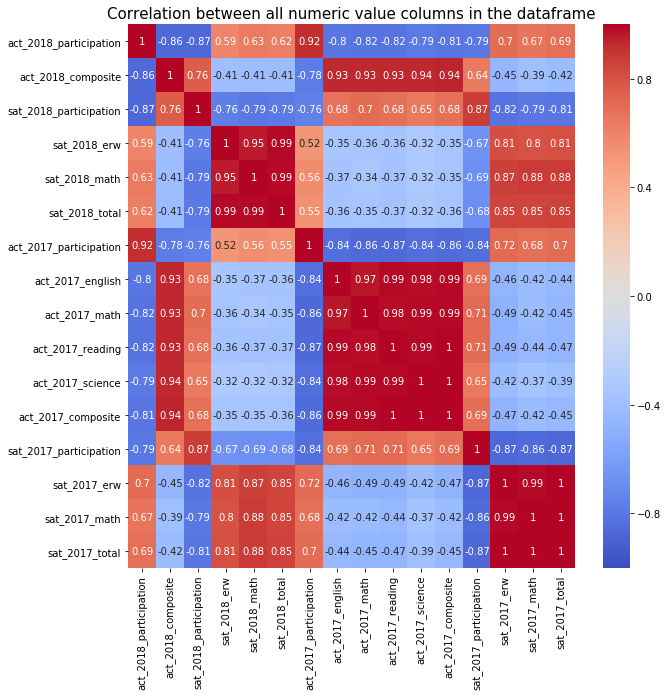

In [648]:

fig, ax = plt.subplots(1, figsize = (10,10))

ax.set_title('Correlation between all numeric value columns in the dataframe', fontsize =15)

p = sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [211]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels): 
   
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    # Makes sure you have enough rows 
    # np.ceil: The ceil of the scalar x is the smallest integer i, such that i >= x.
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,5*nrows) ) 
    #defining that ax has nrows and ncols --> this makes a nested list
    ax = ax.ravel() 
    # We want to iterate through nested list to put data into subplots. Complicated if it's nested list. 
    #But Ravel turns a nested list into a list, which is easier to iterate
    

    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        
        
        ax[i].hist(dataframe[column],color="grey", ) 
        
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(str(list_of_titles[i]), fontsize =15)
        
        ax[i].set_ylabel('Number of States',fontsize=15)
        
        ax[i].set_xlabel('Percentages of Participation',fontsize=15)
        
        #Changing size of x and y ticks. 
        # Found here: https://stackoverflow.com/questions/19626530/python-xticks-in-subplots
        ax[i].tick_params(axis="x", labelsize=12) 
        ax[i].tick_params(axis="y", labelsize=12) 
        ax[i].axvline(dataframe[column].mean(), color = 'red', linewidth = 2)
        
        ax[i].grid()
        
        
        fig.tight_layout() 


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### Participation rates for SAT & ACT

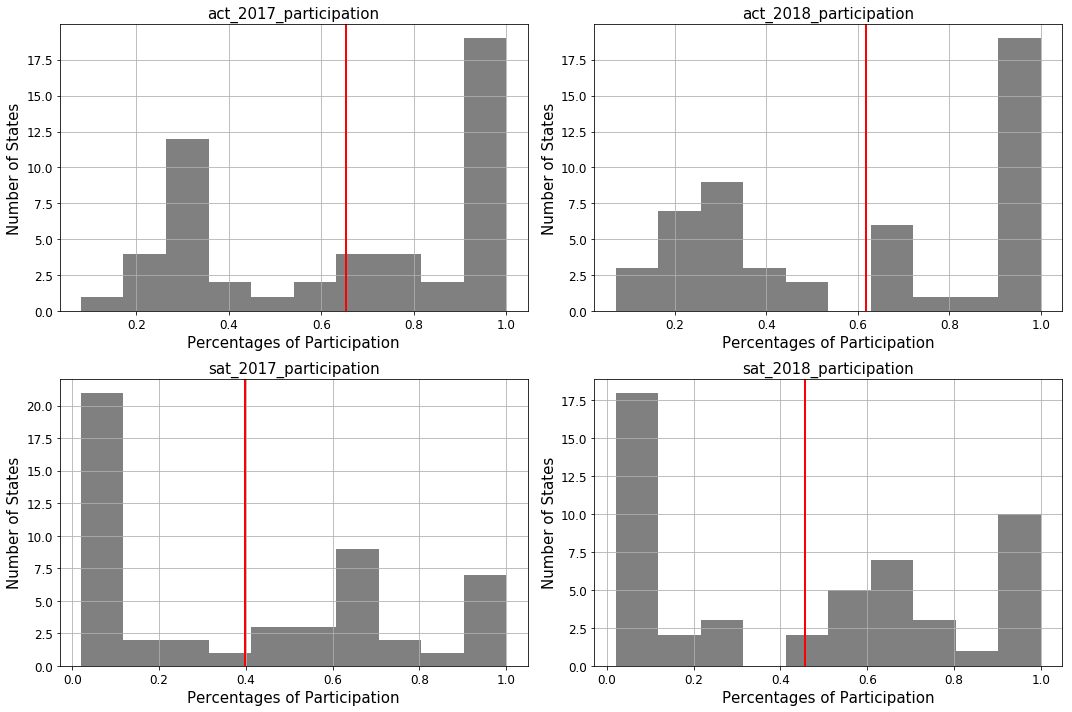

In [215]:
subplot_histograms(final_df, ['act_2017_participation', 'act_2018_participation',
                              'sat_2017_participation','sat_2018_participation'],
                   ['act_2017_participation', 'act_2018_participation',
                    'sat_2017_participation','sat_2018_participation'],
                   ['act_2017_participation', 'act_2018_participation',
                    'sat_2017_participation','sat_2018_participation'])

#### SAT & ACT Participation
  - There are a lot of states that don’t participate in the SAT at all or with a participation rate of less than 10%. That is different for the ACT participation rate: There are very vew states that don't participate in the ACT at all.
  
  - The number of states having a 90 to 100% participation rate is for the ACT much higher that for the SAT.
  
  - For 2018 we can see a increase of SAT participation rates in comparision to 2017. The number of states having 90% or more participation increased as well as the number of states havin between 50 and 80% participation rates.
  
#### Findings:
- There a still a lot of states that don't participate in the SAT in 2018, which gives us a lot potential for growth in those states.
  
  - Thers is an increasing number of states that participated in the 2018 SAT with rates higher than 50%. The focus for those states should be to convince them to have the SAT as the exclusive national assesment test.
  

#### Math scores for SAT & ACT

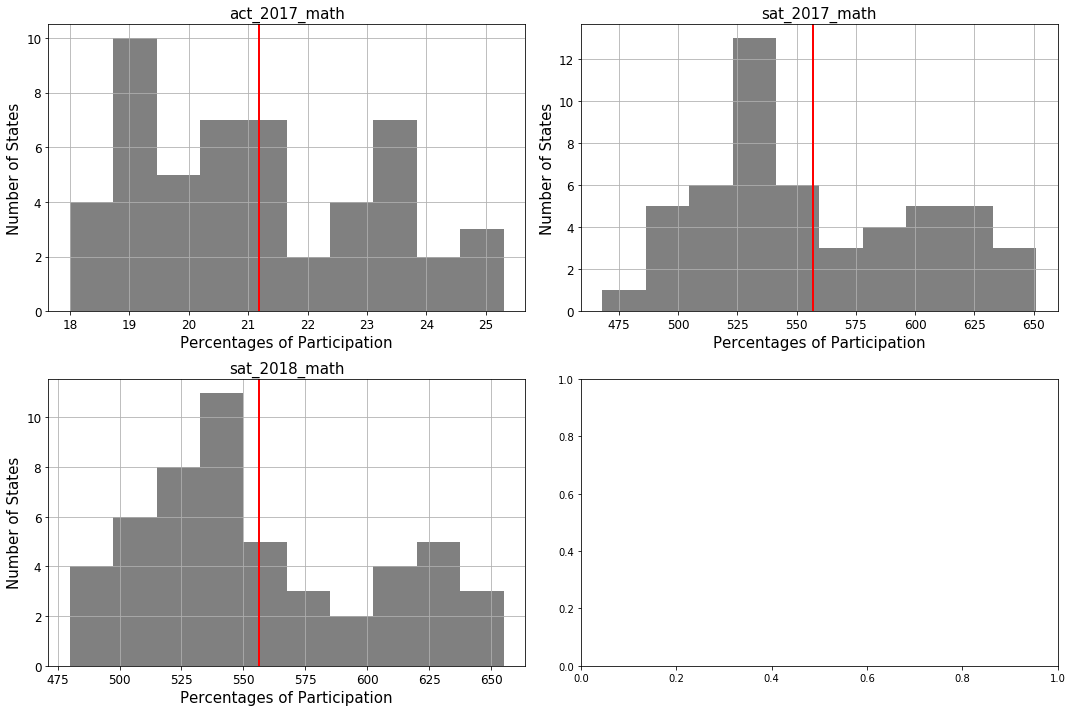

In [213]:
subplot_histograms(final_df,
                   ['act_2017_math','sat_2017_math','sat_2018_math'],
                   ['act_2017_math','sat_2017_math','sat_2018_math'],
                   ['act_2017_math','sat_2017_math','sat_2018_math']);

#### Math scores for SAT & ACT

#### ACT 2017 Math Scores Distributions of 51 states

  - 25 states scored under the mean of 21 points.
  
  - 14 states had very low scores (<19.4).
  - 19 states had low scores (>19.4 and <21.8). 
  - 6 states had high scores (>21.8 and <23.1).
  - 12 states had very high scores (>23.1).
  

#### SAT 2017 Math Scores Distributions of 51 states
  - 31 states scored under the mean of 557 points.
  
   - 6 states had very low scores (<505)
   - 25 states had low scores (>505 and <556)
   - 7 states had high scores (>556 and <597)
   - 13 stated had very high scores (>597)

#### SAT 2018 Math Scores Distribution of 51 states
  - 29 states scored under the mean of 556 points
  
  - 10 states had very low scores (<513)
  - 19 states had low scores (>513 and <550)
  - 10 states had high scores (>550 and <602)
  - 12 stated had very high scores (>602)

Note: We don't have data for the 2018 ACT Math scores.

#### Reading/verbal scores for SAT & ACT

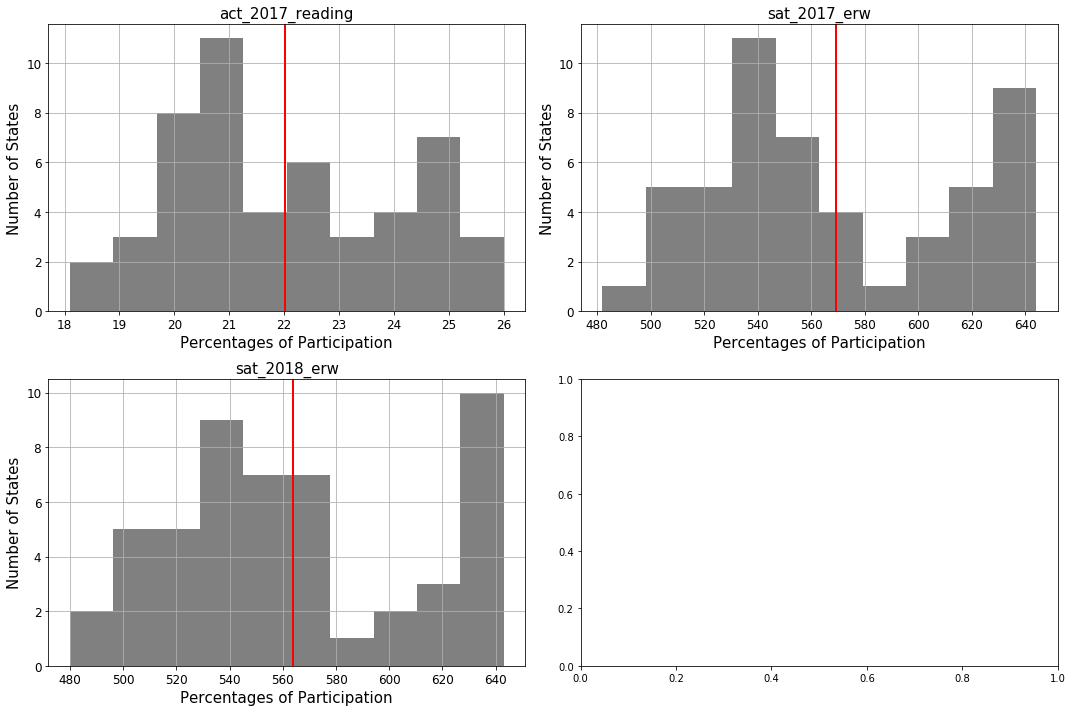

In [306]:
subplot_histograms(final_df,
                   ['act_2017_reading','sat_2017_erw','sat_2018_erw'],
                   ['act_2017_reading','sat_2017_erw','sat_2018_erw'],
                   ['act_2017_reading','sat_2017_erw','sat_2018_erw']);

#### ACT 2017 Reading Scores Distributions of 51 states

  - 30 states scored under the mean of 22 points.
  
  - 7 states had very low scores (<19.7).
  - 23 states had low scores (>19.7 and <22.1). 
  - 9 states had high scores (>22.1 and <23.8).
  - 13 states had very high scores (>23.8).
  

#### SAT 2017 ERW Scores Distributions of 51 states
  - 29 states scored under the mean of 569 points.
  
  - 6 states had very low scores (<515)
  - 23 states had low scores (>515 and <562)
  - 5 states had high scores (>562 and <598)
  - 17 stated had very high scores (>598)

#### SAT 2018 Reading Scores Distributions of 51 states 
  - 29 states scored under the mean of 563 points
  
  - 12 states had very low scores (<525)
  - 16 states had low scores (>525 and <560)
  - 8 states had high scores (>560 and <596)
  - 15 stated had very high scores (>596)
  

In [125]:
sat_2018_df.describe()

,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000
mean,0.457451,563.686275,556.235294,1120.019608
std,0.373143,47.502627,47.772623,94.155083
min,0.020000,480.000000,480.000000,977.000000
25%,0.045000,534.500000,522.500000,1057.500000
50%,0.520000,552.000000,544.000000,1098.000000
75%,0.775000,610.500000,593.500000,1204.000000
max,1.000000,643.000000,655.000000,1298.000000


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [197]:
def subplot_scatter_plots(dataframe, list_1, list_2, title_list):
    
   
    nrows = int(np.ceil(len(list_1)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel() 
    
    for i in range(len(list_1)): 
        sns.scatterplot(dataframe[list_1[i]],dataframe[list_2[i]],ax = ax[i])
       
        
        ax[i].set_title(title_list[i], fontsize =18)
        #ax[i].set_ylabel(y[i],fontsize=15)
        
        #ax[i].set_xlabel(x[i],fontsize=15);
        
         
    plt.tight_layout()

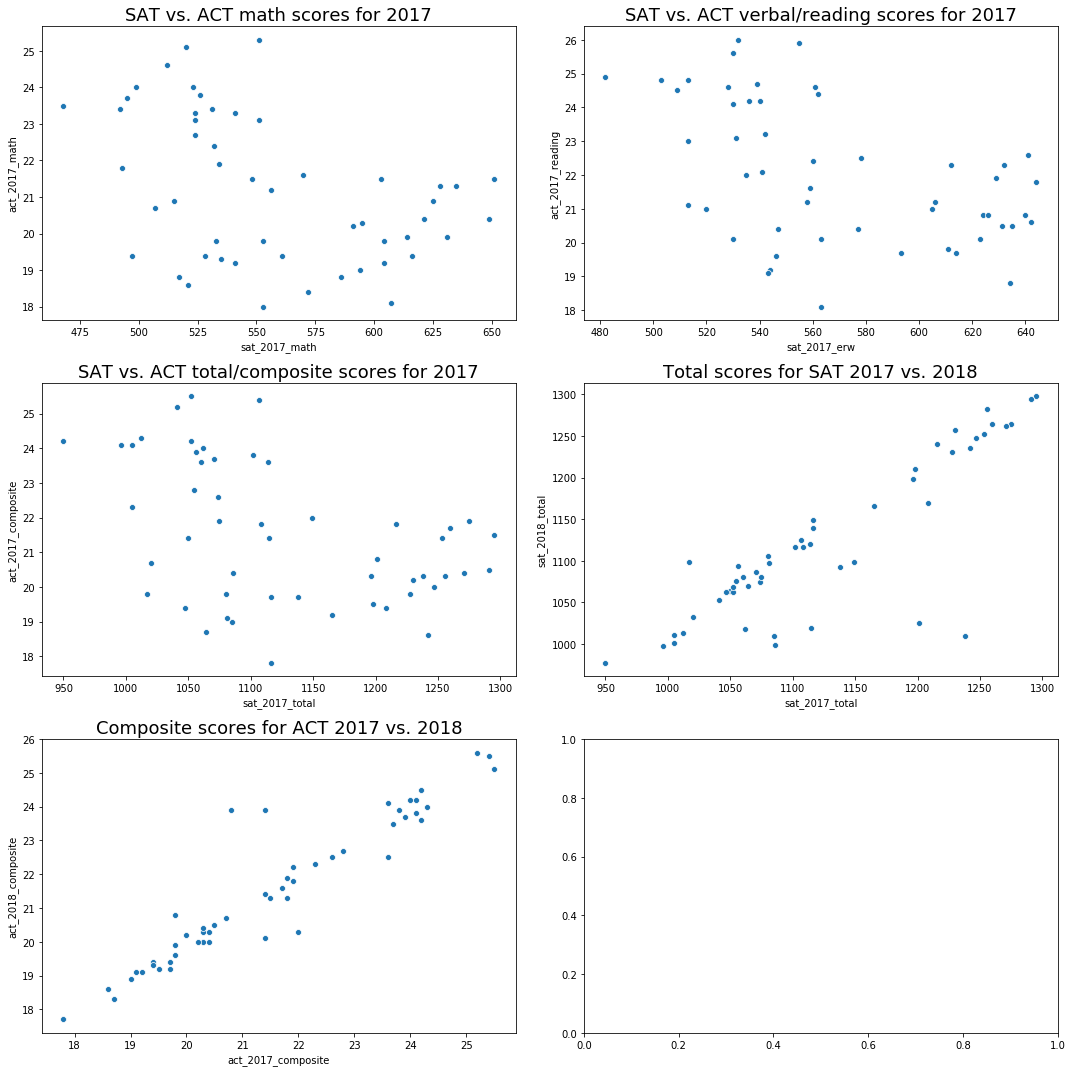

In [198]:
subplot_scatter_plots(final_df,['sat_2017_math', 'sat_2017_erw', 'sat_2017_total', 'sat_2017_total','act_2017_composite'],
                      ['act_2017_math', 'act_2017_reading', 'act_2017_composite', 'sat_2018_total','act_2018_composite'],
                      ['SAT vs. ACT math scores for 2017',
                       'SAT vs. ACT verbal/reading scores for 2017',
                       'SAT vs. ACT total/composite scores for 2017',
                       'Total scores for SAT 2017 vs. 2018','Composite scores for ACT 2017 vs. 2018'])

   



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

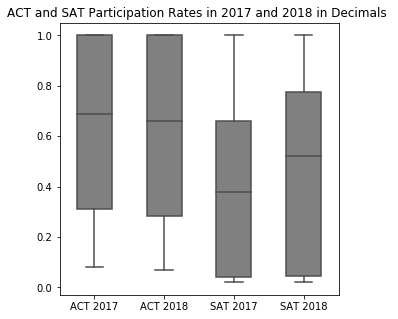

In [229]:
plt.figure(figsize = (5,5))
p = sns.boxplot(data= [final_df['act_2017_participation'],
                   final_df['act_2018_participation'],
                   final_df['sat_2017_participation'],
                   final_df['sat_2018_participation']],
            color = 'grey',
            width = 0.5,)
plt.xticks([0,1,2,3], ('ACT 2017','ACT 2018','SAT 2017', 'SAT 2018'))
plt.title('ACT and SAT Participation Rates in 2017 and 2018 in Decimals ', size = 12);


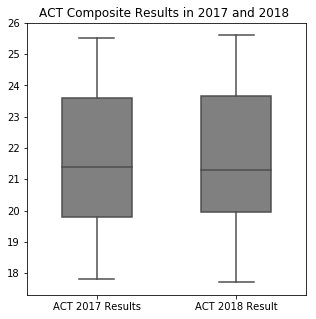

In [234]:
plt.figure(figsize = (5,5))
p = sns.boxplot(data= [final_df['act_2017_composite'],
                   final_df['act_2018_composite']],
            color = 'grey',
            width = 0.5,)
plt.xticks([0,1], ('ACT 2017 Results','ACT 2018 Result'))
plt.title('ACT Composite Results in 2017 and 2018 ', size = 12);


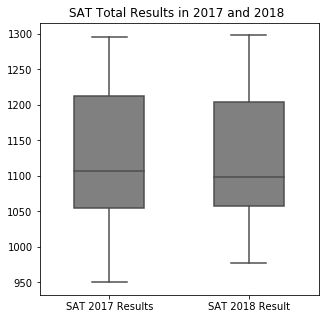

In [235]:
plt.figure(figsize = (5,5))
p = sns.boxplot(data= [final_df['sat_2017_total'],
                   final_df['sat_2018_total']],
            color = 'grey',
            width = 0.5,)
plt.xticks([0,1], ('SAT 2017 Results','SAT 2018 Result'))
plt.title('SAT Total Results in 2017 and 2018 ', size = 12);


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Is there a correlation between participation rate and test results for a given test?

Creating a heat map: 

To see correlation between participation rate per test and the test results more easily,
I only include the participation rates and the total/composite results for ACT and SAT in 2017 and 2018.


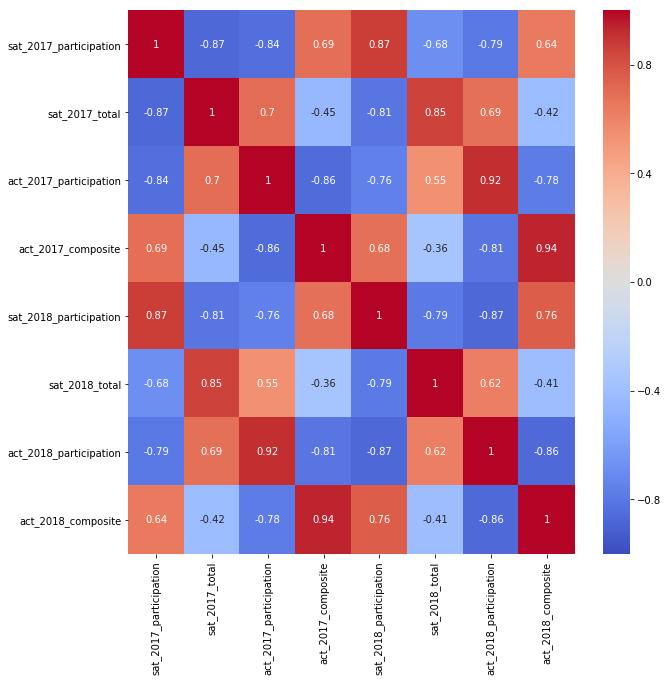

In [144]:
final_df_filtered = final_df[['sat_2017_participation','sat_2017_total','act_2017_participation','act_2017_composite',
                            'sat_2018_participation','sat_2018_total','act_2018_participation','act_2018_composite']]

final_df_filtered_corr = final_df_filtered.corr()



fig, ax = plt.subplots(1, figsize = (10,10));



p = sns.heatmap(final_df_filtered.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1);



There is a strong negative correlation between participation rates of a test and the results of the test.
This is true for SAT and ACT for 2017 and 2018.

There is also a strong negative correlation between SAT Participation Rates and ACT Participation Rates.
This is plausible, since states that require one test don't require the other one. Therefore participation rates for the other test are low.

#### ACT
Note: We don't have data for the 2018 ACT Math and Reading scores.

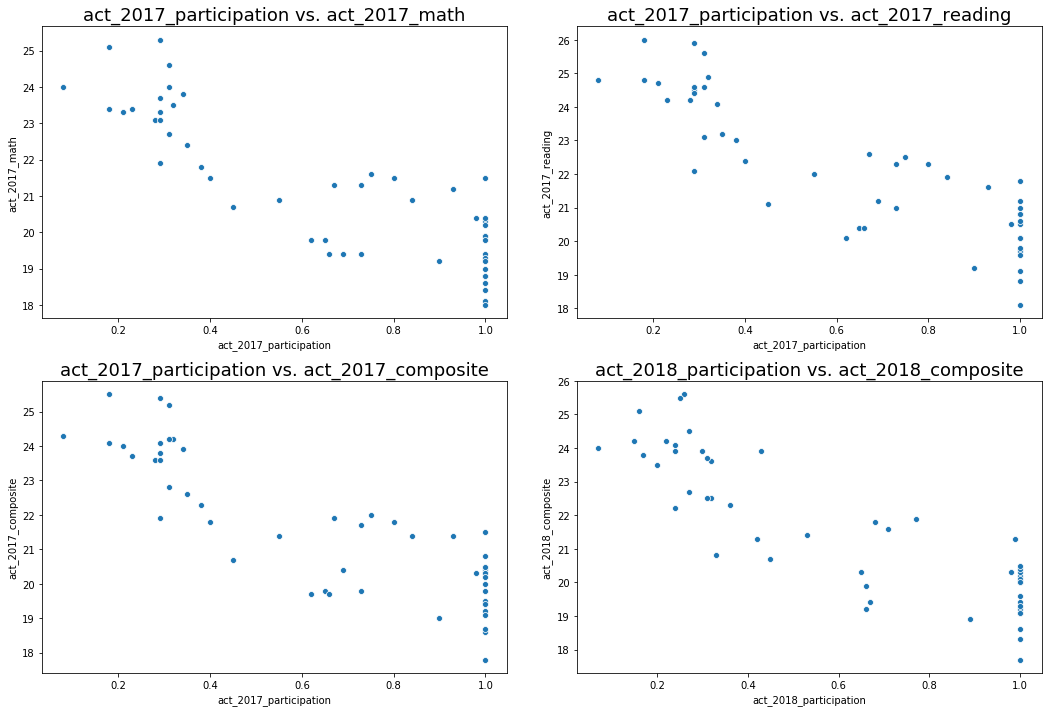

In [266]:
subplot_scatter_plots(final_df,['act_2017_participation', 
                                'act_2017_participation', 
                                'act_2017_participation', 
                                'act_2018_participation'],
                      
                      ['act_2017_math',
                       'act_2017_reading',
                       'act_2017_composite',
                       'act_2018_composite'],
                      
                      ['act_2017_participation vs. act_2017_math', 
                       'act_2017_participation vs. act_2017_reading', 
                       'act_2017_participation vs. act_2017_composite',
                       'act_2018_participation vs. act_2018_composite'])


The scatter plots show that Participation Rates correlate negatively with the test results in all tested categories, the total score, and for both years.

### SAT

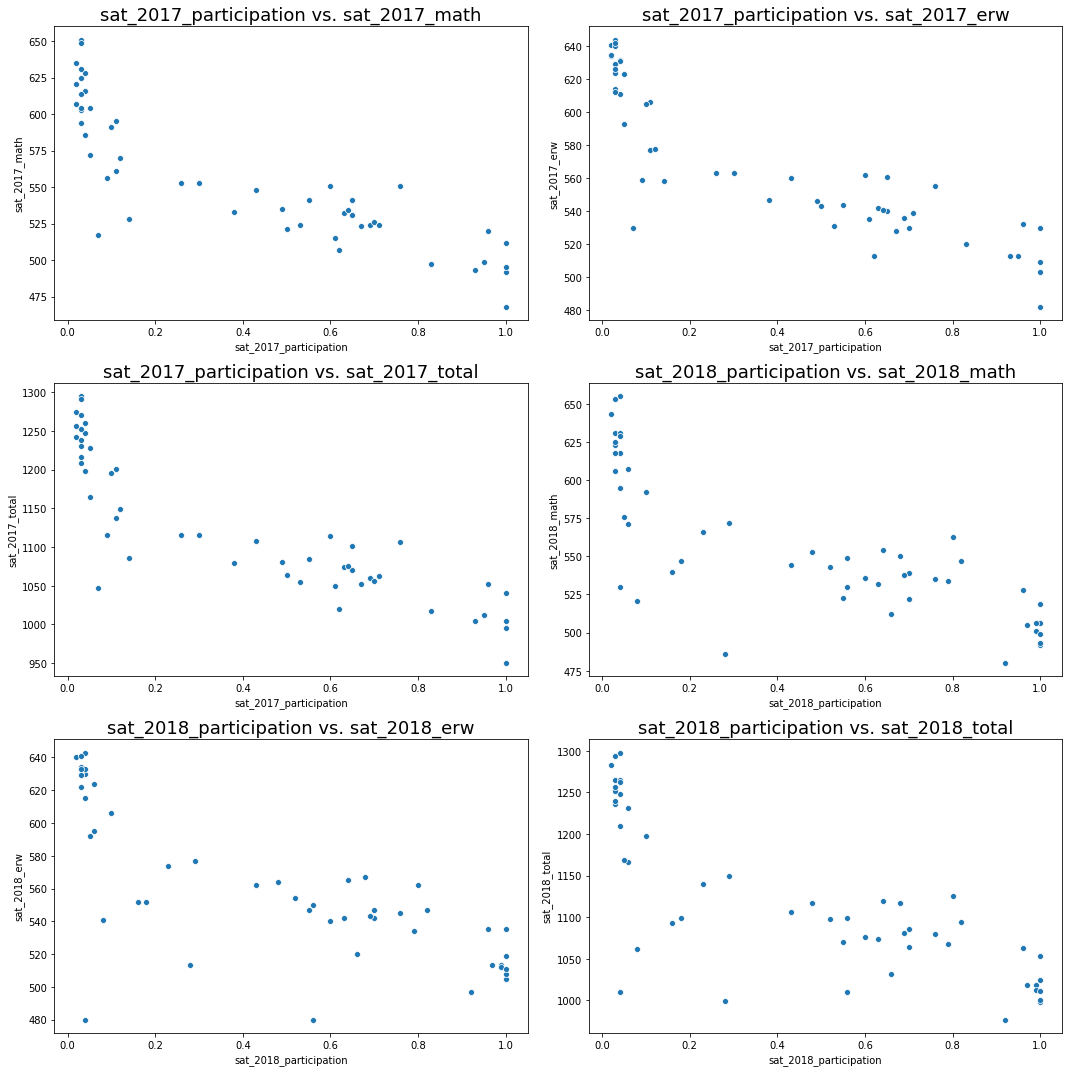

In [152]:
subplot_scatter_plots(final_df,['sat_2017_participation',
                                'sat_2017_participation',
                                'sat_2017_participation',
                                'sat_2018_participation',
                                'sat_2018_participation',
                                'sat_2018_participation'],
                      
                      ['sat_2017_math',
                       'sat_2017_erw',
                       'sat_2017_total',
                       'sat_2018_math', 
                       'sat_2018_erw',
                       'sat_2018_total',],
                      
                      ['sat_2017_participation vs. sat_2017_math', 
                       'sat_2017_participation vs. sat_2017_erw', 
                       'sat_2017_participation vs. sat_2017_total',
                       'sat_2018_participation vs. sat_2018_math', 
                       'sat_2018_participation vs. sat_2018_erw', 
                       'sat_2018_participation vs. sat_2018_total'])

The scatter plots show that Participation Rates correlate negatively with the test results in all tested categories, the total score, and for both years.

#### Conclusion:
The negative correlation between participation rate and outcome of the tests makes sense since in states with high participation rates students are required to take the test, no matter if they are planning to go to college or not. This students spend less time in preparation and have lower scores. In states that don't require the test, only does students who want to go to college take the test. They are more motivated to do well, study more, and get higher scores.

This brings up the question if the college admission test should be used for national school assesment. The SAT and ACT scores are biased by the socioeconomic background of the students taking them. Students from higher class families are expected to go to college and therefore spend a lot of emphasis (and money) in preparation for the tests. Thus, a good result from a school district might not be correlated with the quality of the public schools, but with the socioeconomic background of their students.
(The College Board shouldn't mention this in their pitch to the sates.)


##  Bar Chart of Participation Rates for SAT and ACT in 2017 for States with SAT Participation rates between 30 and 80% and SAT scores over mean 

This is for my recommendation to the college board. Please find more information at the end of this notebook under "Conclusions and Recommendations".

In [501]:
final_df['sat_2018_total'].describe()

count      51.000000
mean     1120.019608
std        94.155083
min       977.000000
25%      1057.500000
50%      1098.000000
75%      1204.000000
max      1298.000000
Name: sat_2018_total, dtype: float64

In [ ]:
# Filter for final_df:

high_sat_2018 = final_df['sat_2018_total'] >= 1100 #finds all rows with high sat scores
par_sat_30_80_2018 = (final_df['sat_2018_participation'] >= 0.3) & (final_df['sat_2018_participation'] <= 0.8)#finds all rows with participation rates between 30 and 80%



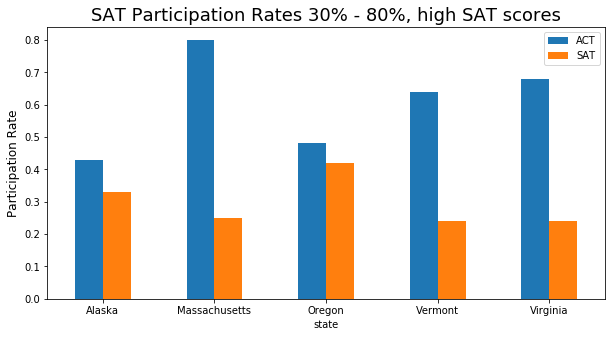

In [526]:
#using filter to build new df:
participation_30_80_df = final_df[['sat_2018_participation','act_2018_participation']][high_sat_2018 & par_sat_30_80_2018]

#plot df:
ax = participation_30_80_df.plot.bar(figsize=(10, 5), width=0.5, color = ['#1F77B4','#ff7f0e'])


ax.set_title('SAT Participation Rates 30% - 80%, high SAT scores', fontsize =18)
ax.set_ylabel('Participation Rate',fontsize=12)
        

ax.set_xticklabels(([i.capitalize() for i in participation_30_80_df.index]), fontsize =10) #returns capitalized index names

ax.legend(['ACT','SAT'],bbox_to_anchor=(1,1), loc="upper right")

plt.savefig("part_30_80_high_sat.png") #saving plot as png file

##  Changes in the Participation Rates 


## Increase of more than 10% for ACT and SAT between 2017 and 2018 per State 

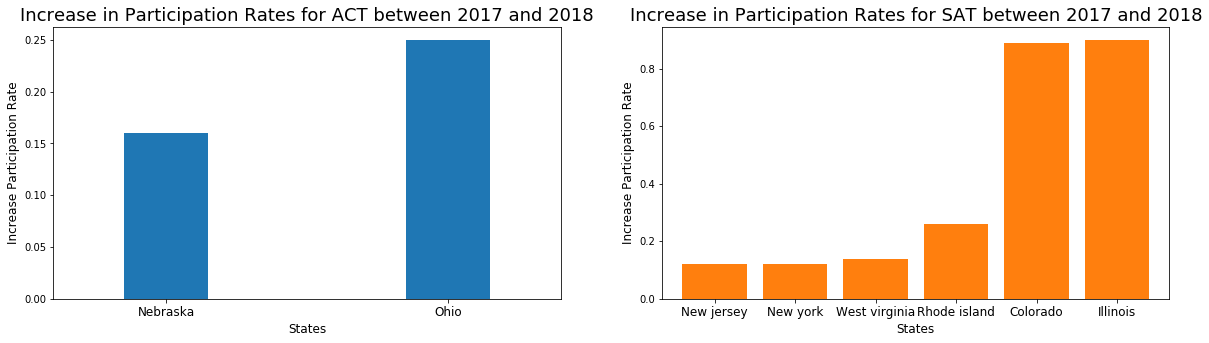

In [531]:
sat_change_df = final_df['sat_2018_participation']-final_df['sat_2017_participation']
act_change_df = final_df['act_2018_participation']-final_df['act_2017_participation']

sat_change_increase_df  = sat_change_df[sat_change_df>0.1].sort_values()
act_change_increase_df  = act_change_df[act_change_df>0.1].sort_values()

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (20,5))


act_change_increase_df.plot(kind = 'bar', width=0.3, ax = ax[0], color = '#1F77B4')
sat_change_increase_df.plot(kind = 'bar', width=0.8, ax = ax[1], color = '#ff7f0e' )


ax[0].set_title('Increase in Participation Rates for ACT between 2017 and 2018', fontsize =18)

ax[1].set_title('Increase in Participation Rates for SAT between 2017 and 2018', fontsize =18)

ax[0].set_ylabel('Increase Participation Rate',fontsize=12)
ax[1].set_ylabel('Increase Participation Rate',fontsize=12)   

ax[0].set_xlabel("States",fontsize=12)
ax[1].set_xlabel("States",fontsize=12)

ax[0].set_xticklabels(([i.capitalize() for i in act_change_increase_df.index]), fontsize =12)
ax[1].set_xticklabels(([i.capitalize() for i in sat_change_increase_df.index]), fontsize =12)

#ax.legend(['ACT','SAT'],bbox_to_anchor=(1,1), loc="upper right")

ax[0].xaxis.set_tick_params(rotation=0)
ax[1].xaxis.set_tick_params(rotation=0)

## Decrease of more than 5% for ACT and SAT between 2017 and 2018 per State

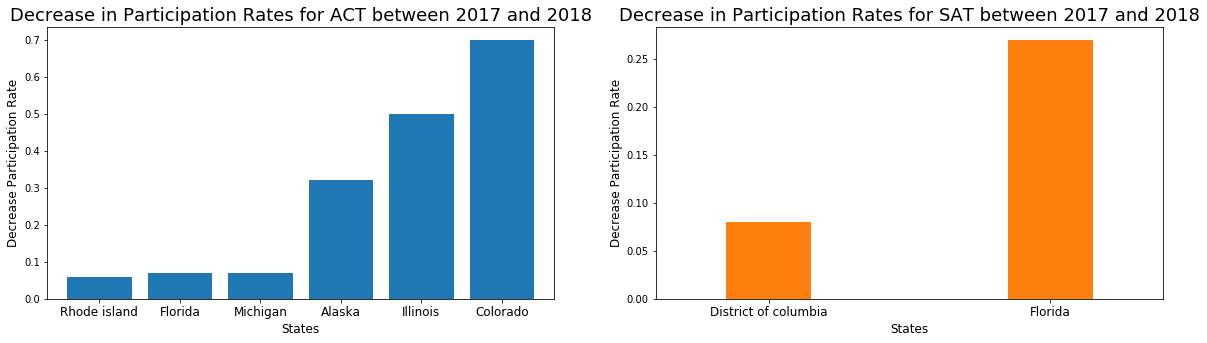

In [532]:
sat_change_df = final_df['sat_2017_participation']-final_df['sat_2018_participation']
act_change_df = final_df['act_2017_participation']-final_df['act_2018_participation']

sat_change_decrease_df  = sat_change_df[sat_change_df>0.05].sort_values()
act_change_decrease_df  = act_change_df[act_change_df>0.05].sort_values()

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (20,5))


act_change_decrease_df.plot(kind = 'bar', width=0.8, ax = ax[0], color = '#1F77B4')
sat_change_decrease_df.plot(kind = 'bar', width=0.3, ax = ax[1], color = '#ff7f0e' )


ax[0].set_title('Decrease in Participation Rates for ACT between 2017 and 2018', fontsize =18)

ax[1].set_title('Decrease in Participation Rates for SAT between 2017 and 2018', fontsize =18)

ax[0].set_ylabel('Decrease Participation Rate',fontsize=12)
ax[1].set_ylabel('Decrease Participation Rate',fontsize=12)   

ax[0].set_xlabel("States",fontsize=12)
ax[1].set_xlabel("States",fontsize=12)

ax[0].set_xticklabels(([i.capitalize() for i in act_change_decrease_df.index]), fontsize =12)
ax[1].set_xticklabels(([i.capitalize() for i in sat_change_decrease_df.index]), fontsize =12)

#ax.legend(['ACT','SAT'],bbox_to_anchor=(1,1), loc="upper right")

ax[0].xaxis.set_tick_params(rotation=0)
ax[1].xaxis.set_tick_params(rotation=0)

### Conclusion:
There is a clear trend of states switching from the ACT to the SAT between 2017 and 2018.
In Illinois and Colorado, the participation rate for the SAT increased by almost 90%.
The increase is due to the sates entering into contracts with the College Board to use the SAT for yearly statewide assessment testing.
Only in Florida (-26%) and in DC (-7.5%) decreased the participation rate for the SAT from one year to another.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [639]:
tableau_sat_2018_df = final_df["sat_2018_participation"][final_df["sat_2018_participation"]>=0.95]
tableau_sat_2018_df.to_csv('data/tableau_sat_2018_df.csv', header="")

In [638]:
tableau_sat_2017_df = final_df["sat_2017_participation"][final_df["sat_2017_participation"]>=0.95]
tableau_sat_2017_df.to_csv('data/tableau_sat_2017_df.csv', header="")

In [637]:
tableau_act_2018_df = final_df["act_2018_participation"][final_df["act_2018_participation"]>=0.95]
tableau_act_2018_df.to_csv('data/tableau_act_2018_df.csv', header="")

In [636]:
tableau_act_2017_df = final_df["act_2017_participation"][final_df["act_2017_participation"]>=0.95]
tableau_act_2017_df.to_csv('data/tableau_act_2017_df.csv',header = "")

### I used tableau to show the states that exclusively use the SAT for statewide assessment testing for the years 2017 and 2018. 

SAT 2017.png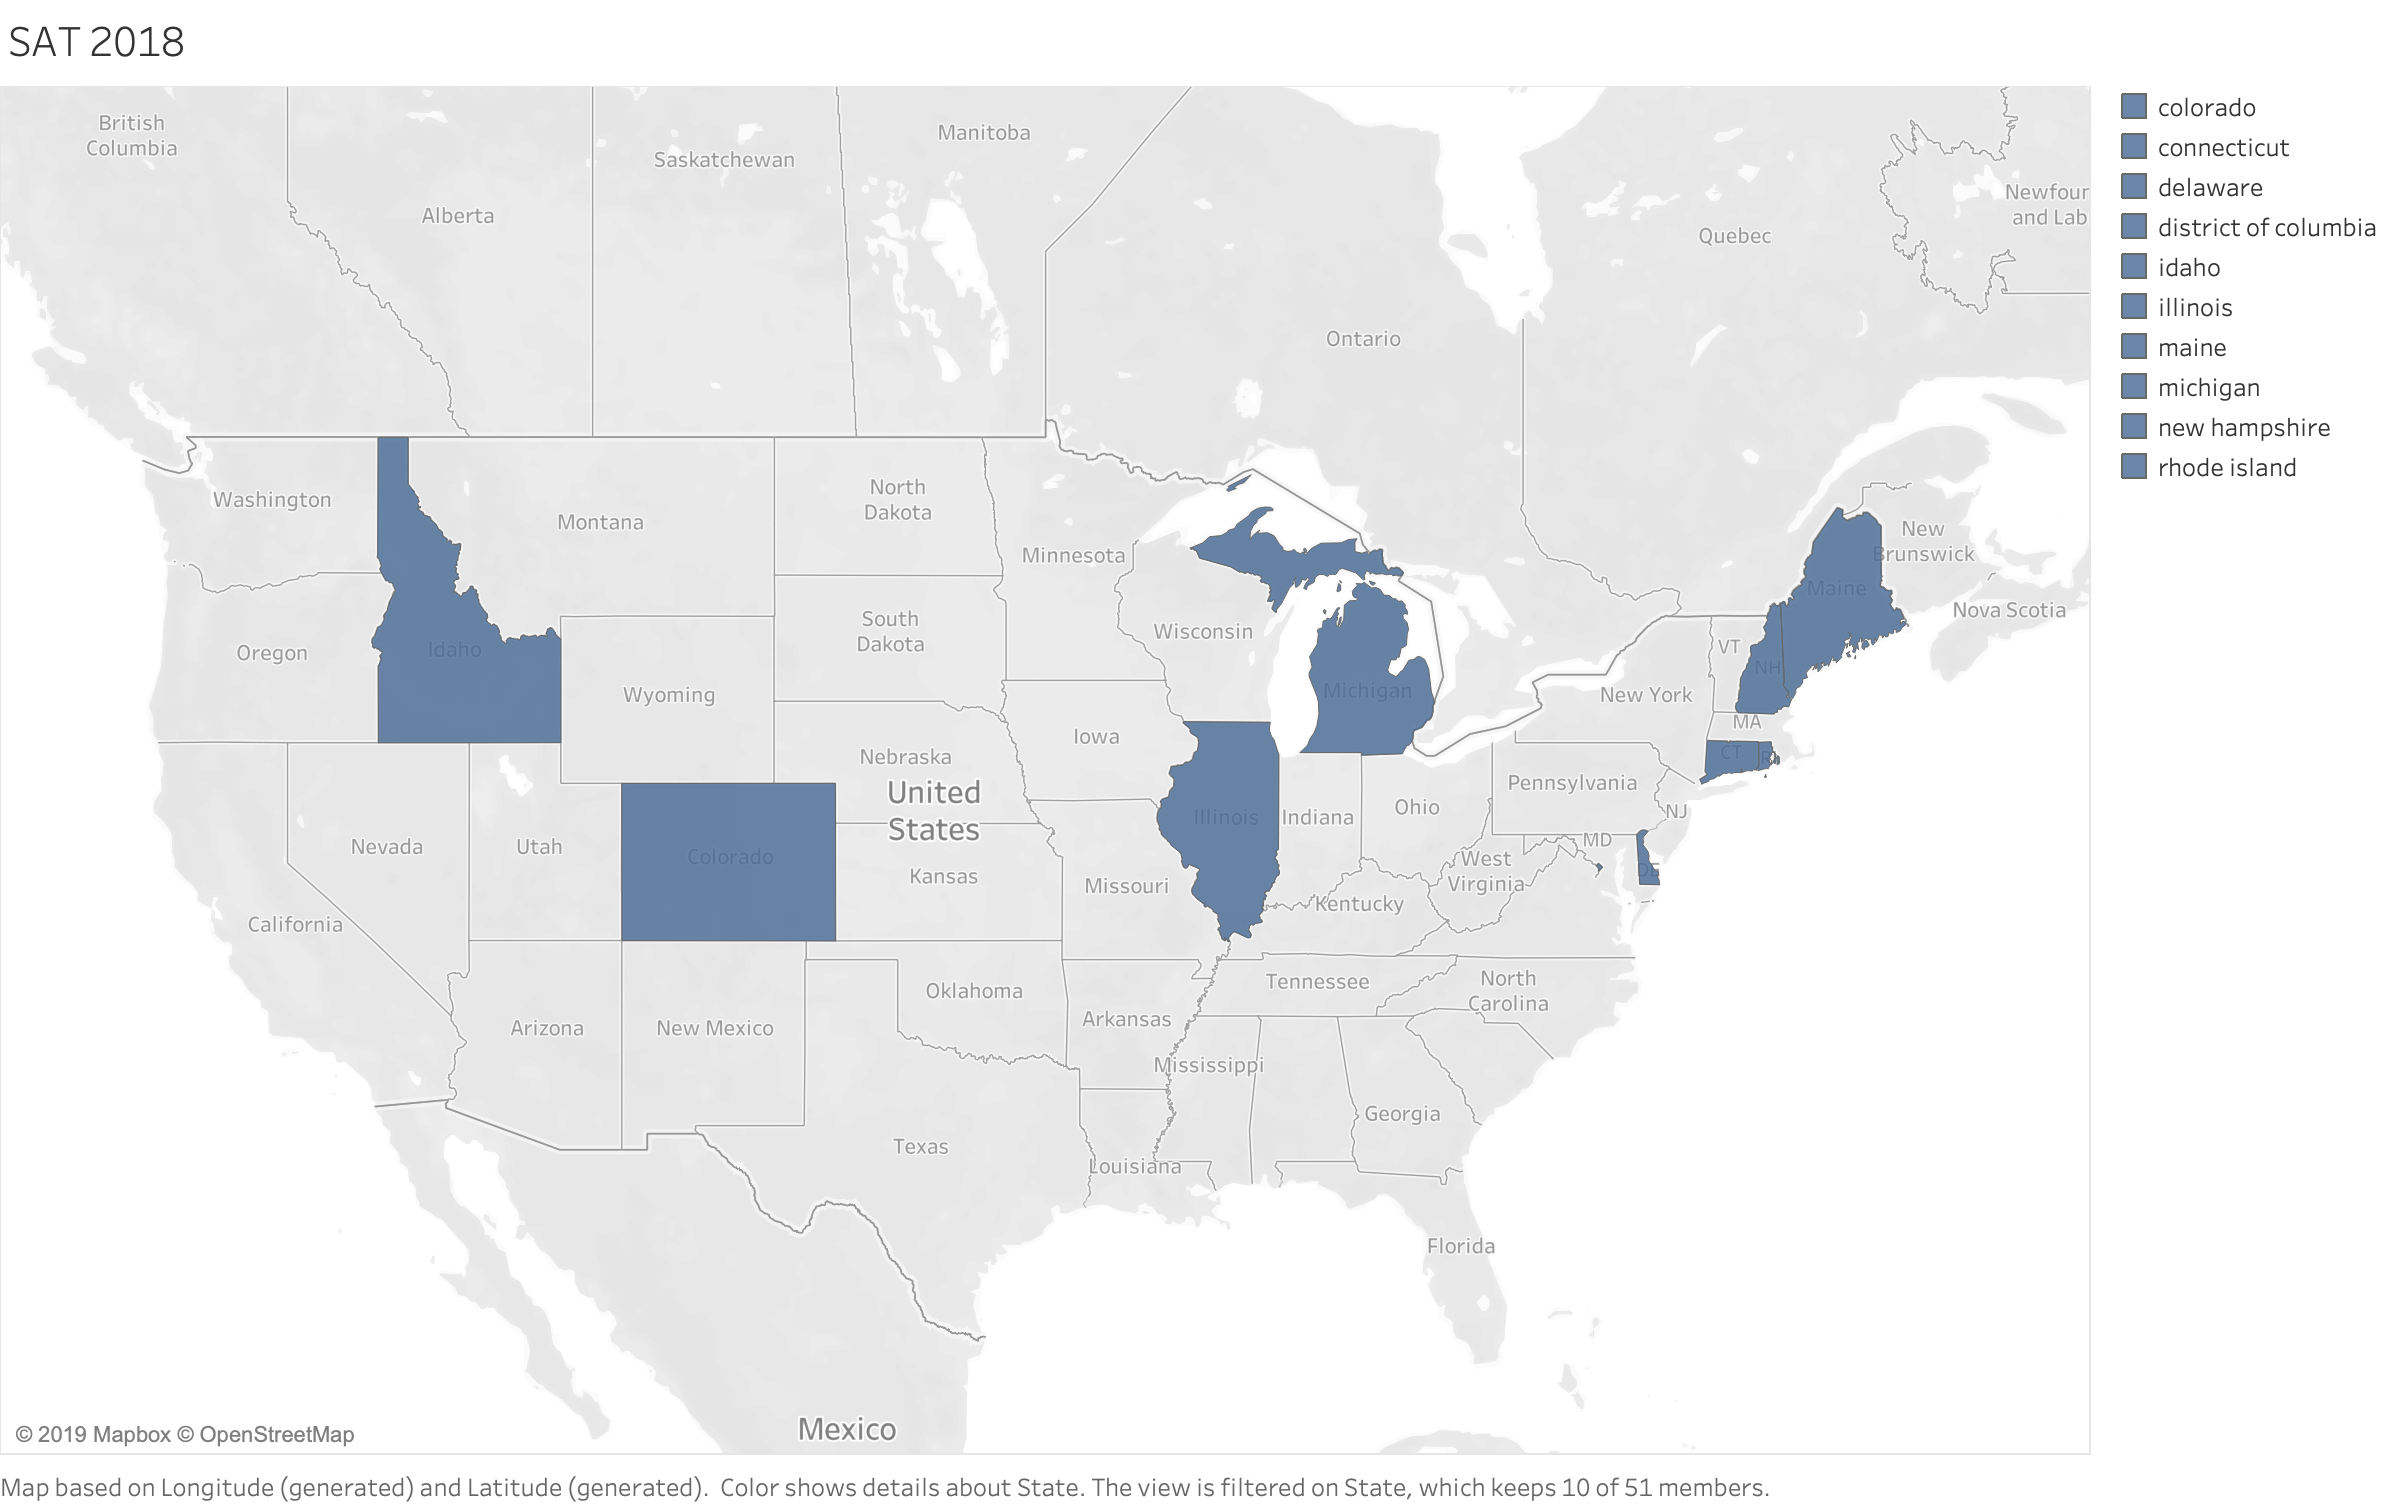
SAT 2018.png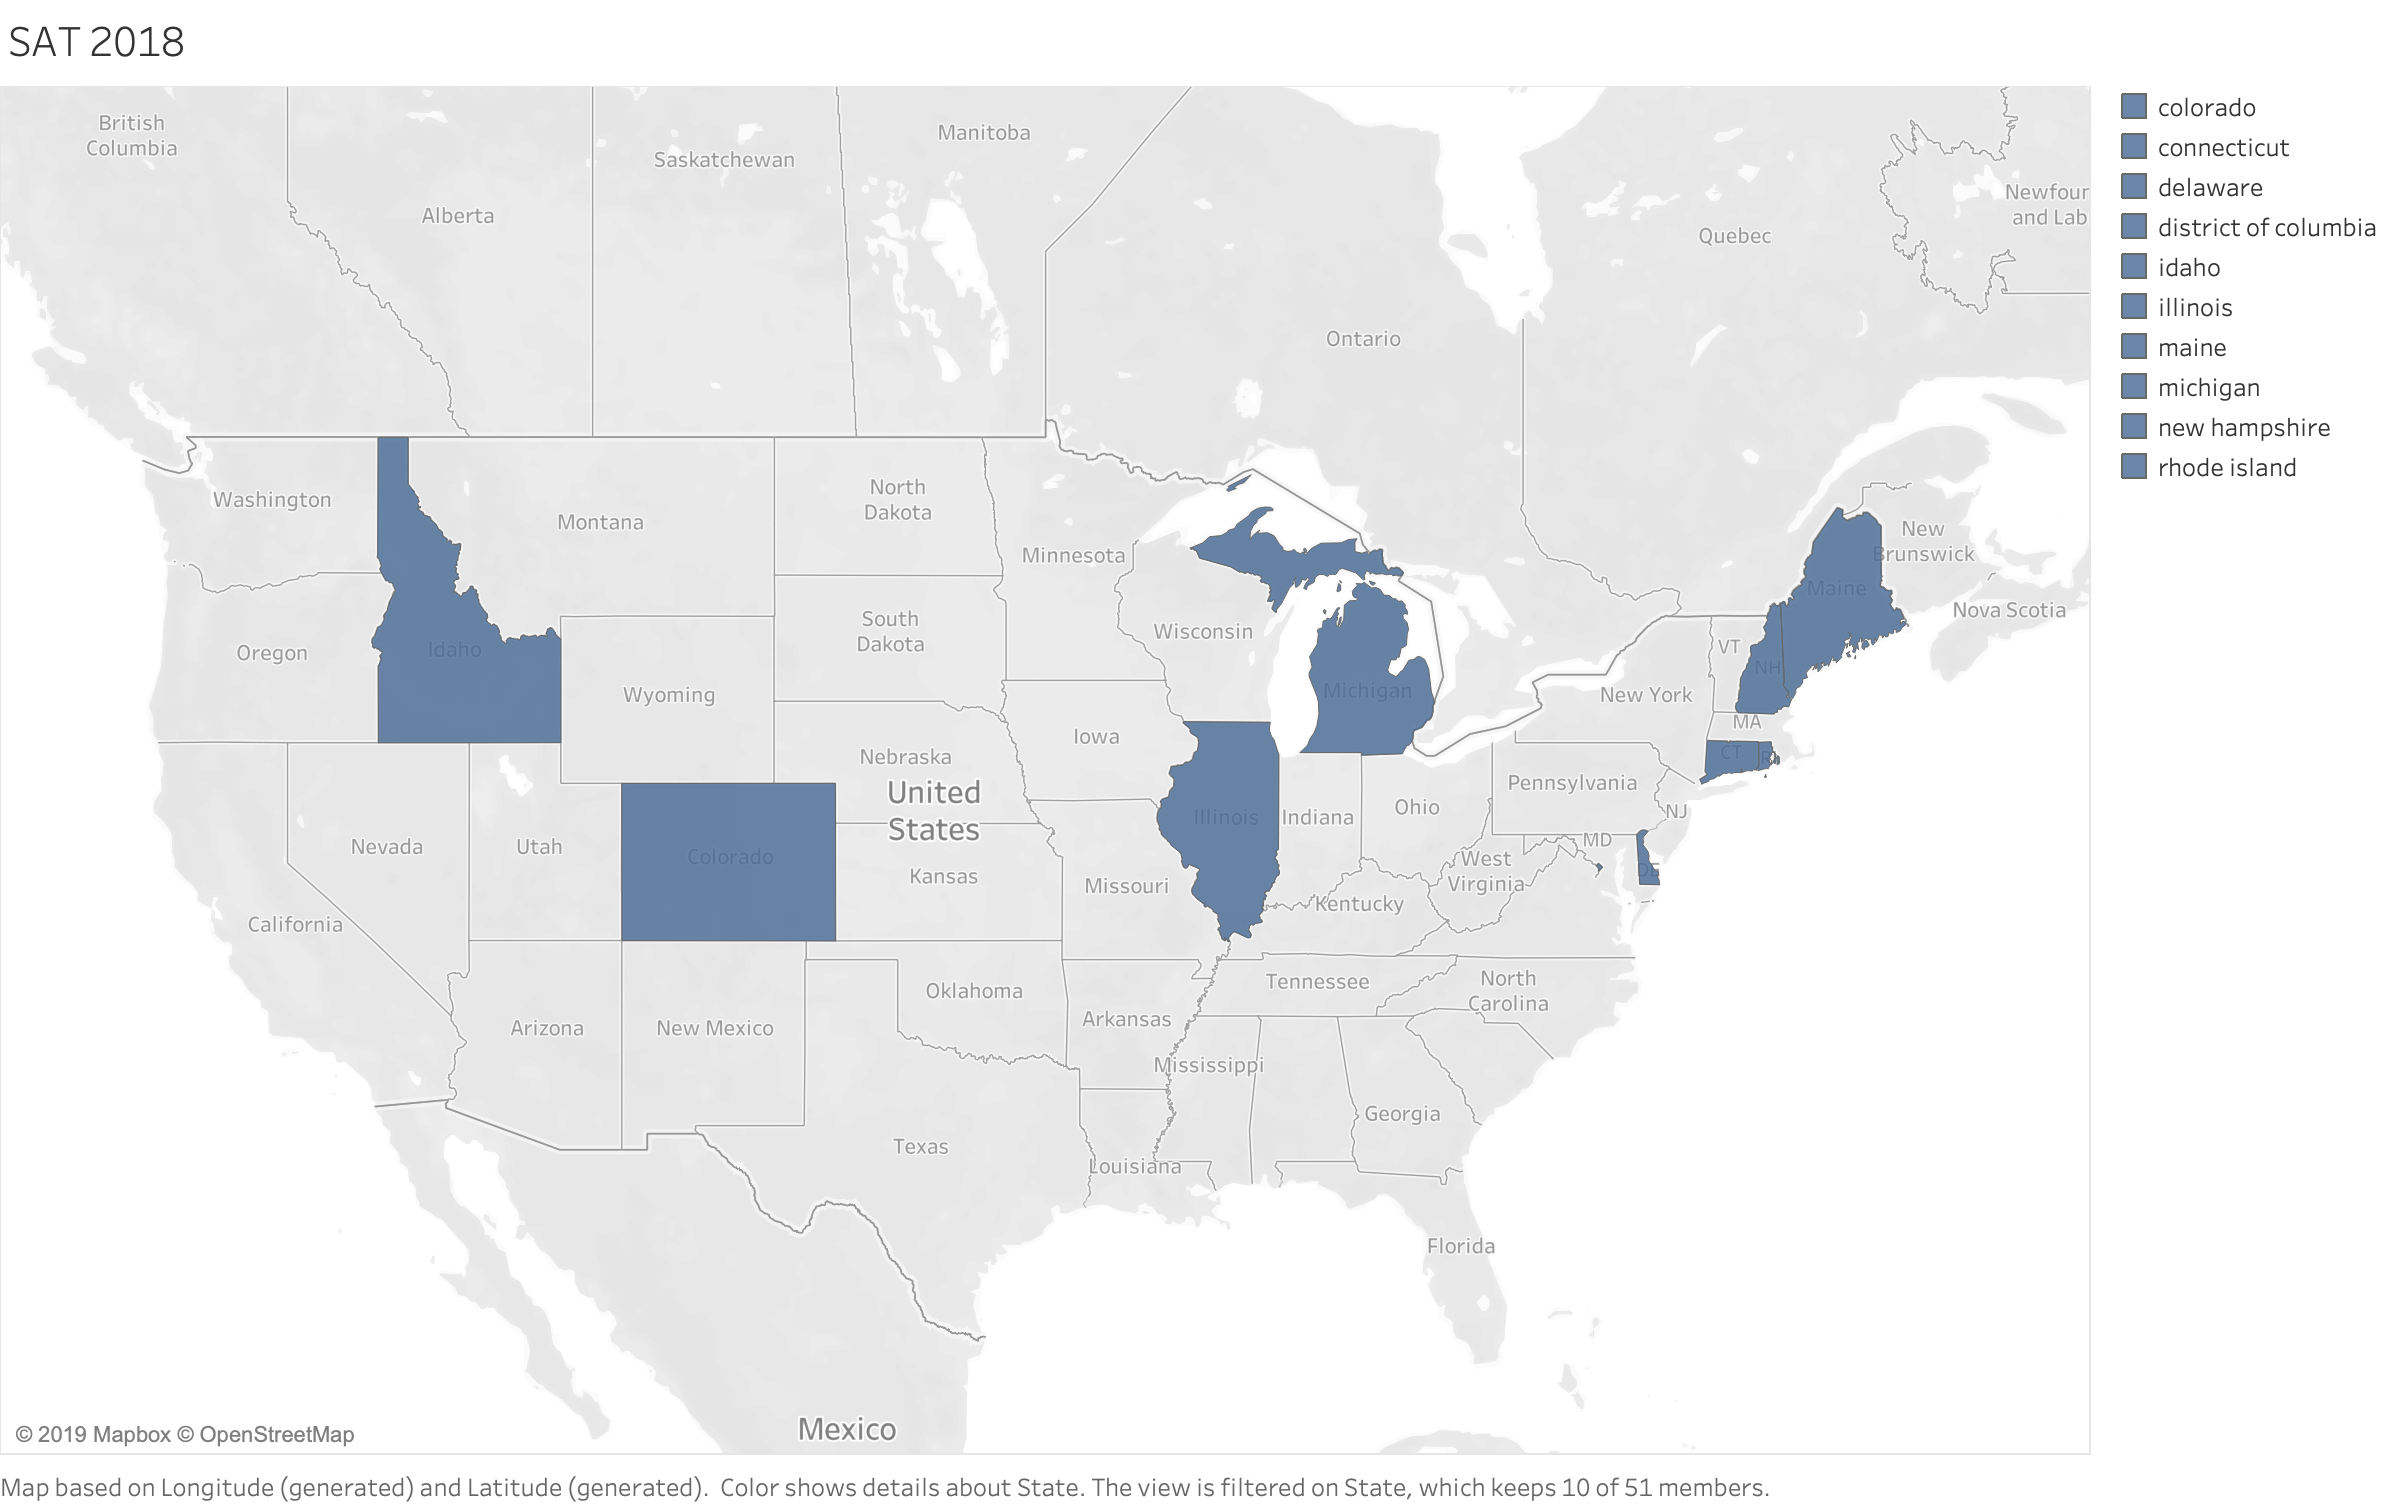

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [552]:
final_df.head()

,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total
state,,,,,,,,,,,,,,,,
alabama,1.00,19.1,0.06,595,571,1166,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
alaska,0.33,20.8,0.43,562,544,1106,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
arizona,0.66,19.2,0.29,577,572,1149,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
arkansas,1.00,19.4,0.05,592,576,1169,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
california,0.27,22.7,0.60,540,536,1076,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [640]:
def subplot_histograms_with_stats(dataframe, list_of_columns, list_of_titles): 
   
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    # Makes sure you have enough rows 
    # np.ceil: The ceil of the scalar x is the smallest integer i, such that i >= x.
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,5*nrows) ) 
    #defining that ax has nrows and ncols --> this makes a nested list
    ax = ax.ravel() 
    # We want to iterate through nested list to put data into subplots. Complicated if it's nested list. 
    #But Ravel turns a nested list into a list, which is easier to iterate
    

    
    for i, column in enumerate(list_of_columns):
       # Gives us an index value to get into all our lists
    
    
        ax[i].axvline(dataframe[column].mean(), color='red')
        ax[i].axvline(dataframe[column].median(), color='orange')
        
        ax[i].hist(dataframe[column],color="grey") 
        
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(str(list_of_titles[i]), fontsize =15)
        
        ax[i].set_ylabel(('Number of States'),fontsize=15)
        
        ax[i].set_xlabel(str(list_of_columns[i]),fontsize=15)
        
        #Changing size of x and y ticks. 
        # Found here: https://stackoverflow.com/questions/19626530/python-xticks-in-subplots
        ax[i].tick_params(axis="x", labelsize=12) 
        ax[i].tick_params(axis="y", labelsize=12) 
        
        ax[i].grid()
        
    
        fig.tight_layout() 
        
        
        
      


In [641]:
final_df.columns

Index(['act_2018_participation', 'act_2018_composite',
       'sat_2018_participation', 'sat_2018_erw', 'sat_2018_math',
       'sat_2018_total', 'act_2017_participation', 'act_2017_english',
       'act_2017_math', 'act_2017_reading', 'act_2017_science',
       'act_2017_composite', 'sat_2017_participation', 'sat_2017_erw',
       'sat_2017_math', 'sat_2017_total'],
      dtype='object')

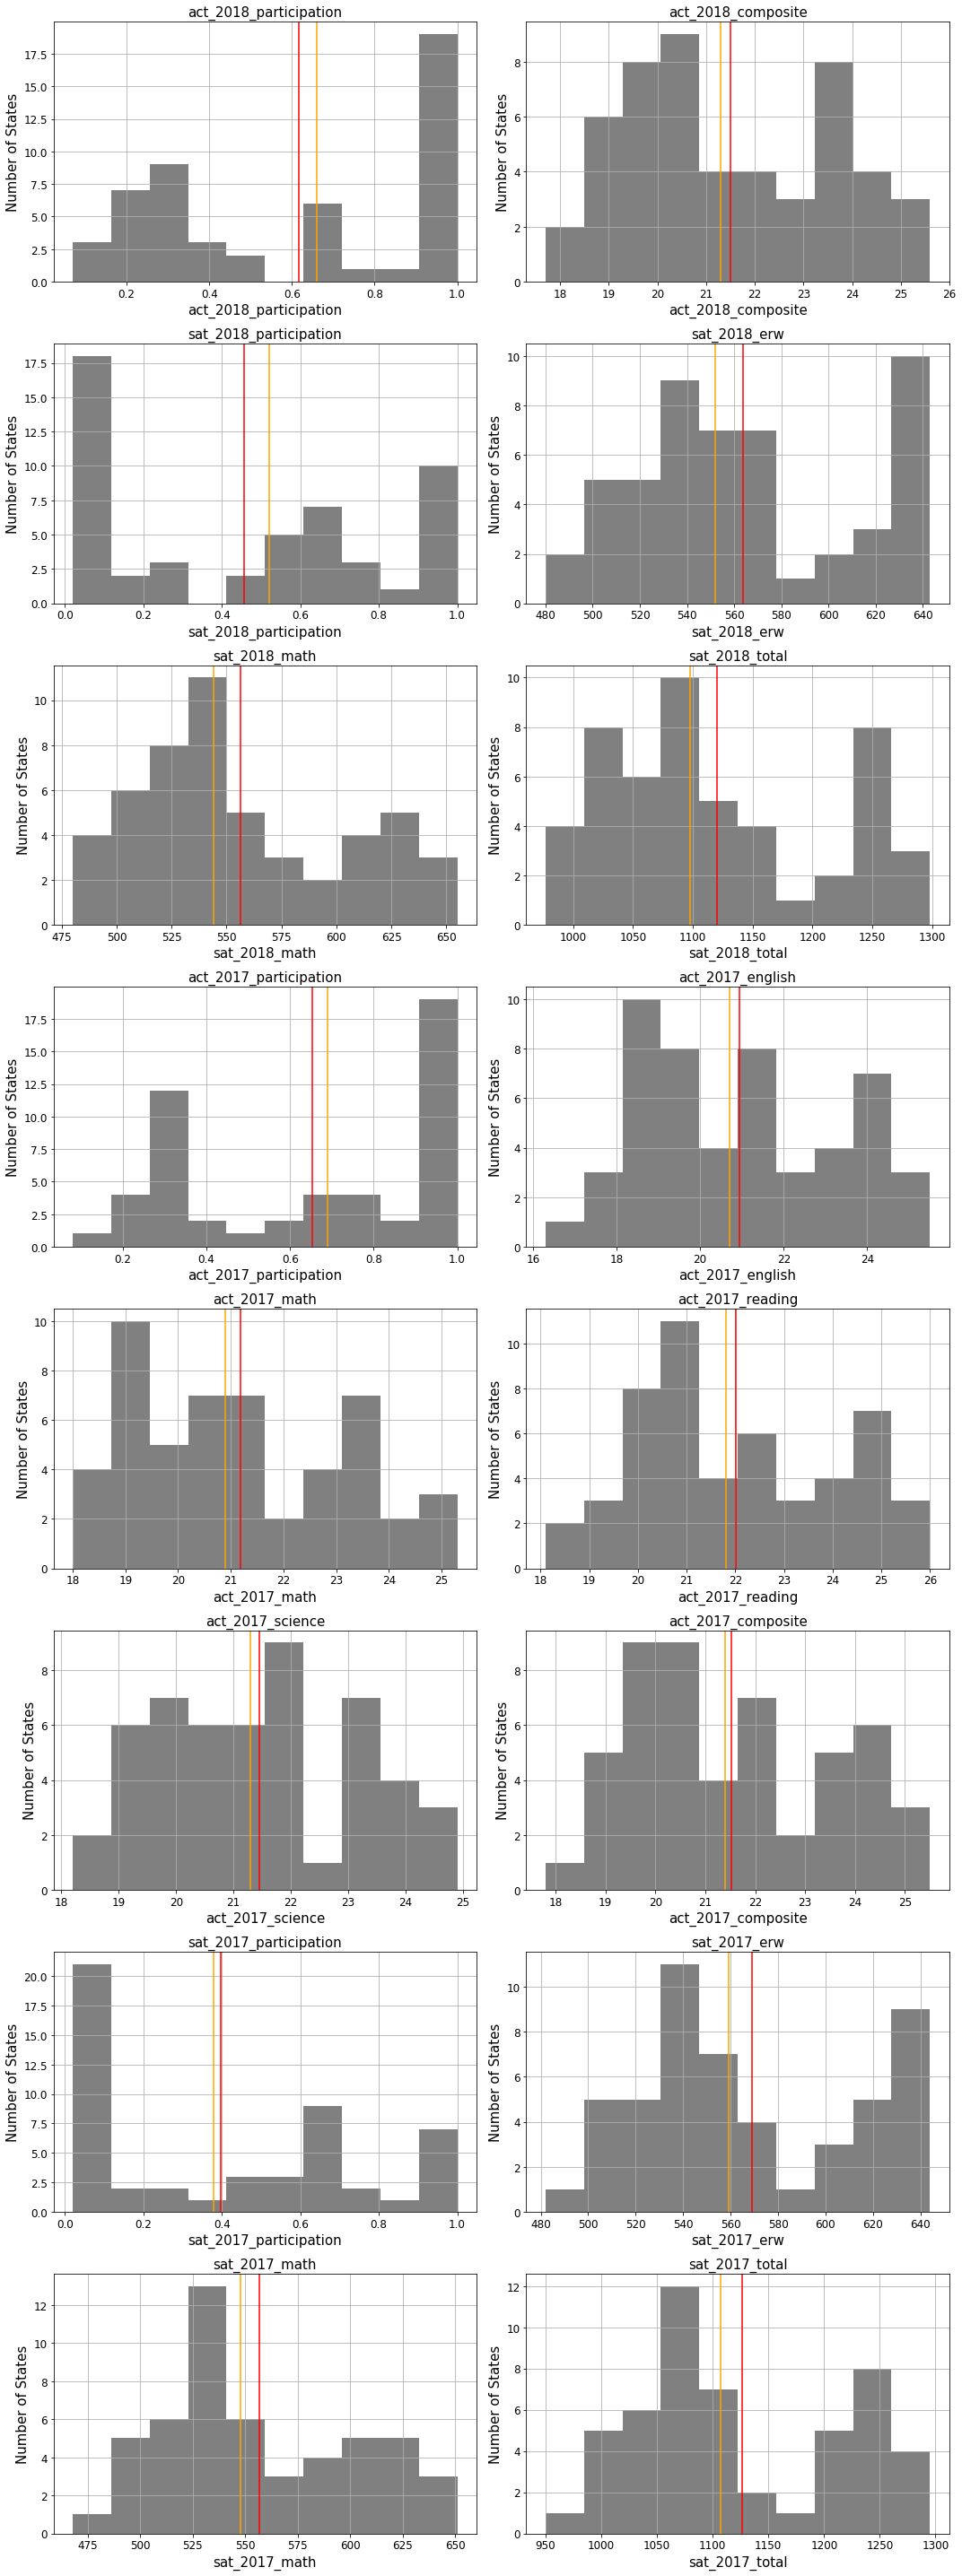

In [642]:
subplot_histograms_with_stats(final_df,['act_2018_participation', 'act_2018_composite',
       'sat_2018_participation', 'sat_2018_erw', 'sat_2018_math',
       'sat_2018_total', 'act_2017_participation', 'act_2017_english',
       'act_2017_math', 'act_2017_reading', 'act_2017_science',
       'act_2017_composite', 'sat_2017_participation', 'sat_2017_erw',
       'sat_2017_math', 'sat_2017_total'],
                   ['act_2018_participation', 'act_2018_composite',
       'sat_2018_participation', 'sat_2018_erw', 'sat_2018_math',
       'sat_2018_total', 'act_2017_participation', 'act_2017_english',
       'act_2017_math', 'act_2017_reading', 'act_2017_science',
       'act_2017_composite', 'sat_2017_participation', 'sat_2017_erw',
       'sat_2017_math', 'sat_2017_total']);

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

No. None of the variables have a normal distribution.
I don't recognize any distribution from the histograms.


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

- Math & Reading
We are looking at the average scores of all the students that took the SAT (or the ACT) in one state.
The Central Limit Theorem states that every distribution of the population, the distribution of the sample means has an approximately normal distribution if:
- the sample size is large enough
- all samples have the same size.
Our samples have very different sizes! So the central Limit Theorem does not apply here.

- Rates
We are looking at the average participation rates for either the SAT or the ACT per state.
We can not apply the Central Limit Theorem here because the participation rates are not a sample of the population. They are not random; in many states, it is mandatory to take one specific test; in others, it isn't. We can not use the States as a population sample for the whole US.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, because states influence the decisions of students if and which test to take.
This changes the populations: In states with voluntary testing only students that are planing to go to college take the test. In other states all students take the test.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: SAT and ACT are different test, focused on different aspects of math. We cannot really compare scores from different test types whith each other. Also, the test have different scores.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

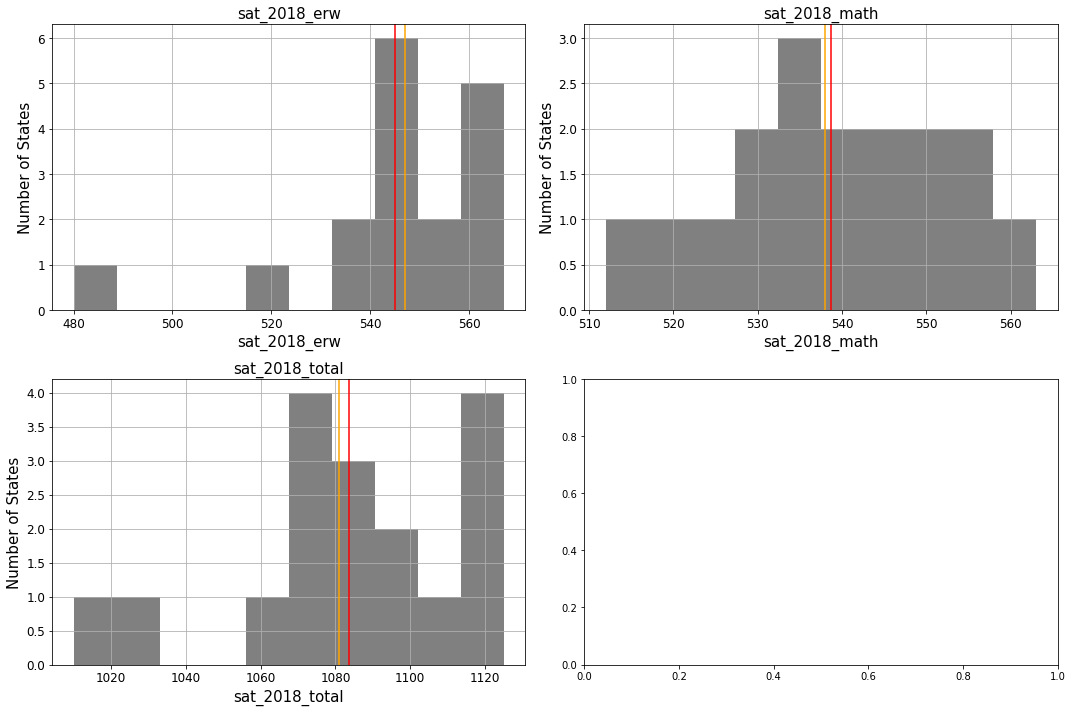

In [643]:
# Code: Scores for States that don't require testing but have high participation rates:

subplot_histograms_with_stats(par_sat_30_80_2018_df ,['sat_2018_erw', 'sat_2018_math',
       'sat_2018_total'],
                   ['sat_2018_erw', 'sat_2018_math',
       'sat_2018_total']);


In [644]:
par_sat_30_80_2018_df = final_df[['sat_2018_erw', 'sat_2018_math',
       'sat_2018_total']][par_sat_30_80_2018]

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Background:
With the The No Child Left Behind Act of 2001, public schools where forced to administer a annualy statewide standardized testto their highschool students in order do receive funding.

Since many states recognized the pressure that is aleady on 11 grades because many of them are preparing for their college admission tests, they decidet to adapt one of those test for their national assesment test, and close a contract with either the College Board (SAT), or the ACT.

In the beginning many states decidet to make the ACT an obligatory test, since it closer aligned with the highschool curriculum, and the ACT overtook the SAT.

But after the release of their reviced SAT test in 2016, the College Board is gaining traction and in 2019 2.1 Million students took the SAT, the highest number ever(https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever).

The number of ACT tests droped slightly to 1.9 (https://www.act.org/content/dam/act/unsecured/documents/cccr2018/National-CCCR-2018.pdf).

My findings in the data:
There is a clear trend of states switching from the ACT to the SAT between 2017 and 2018.
In Illinois and Colorado, the participation rate for the SAT increased by almost 90%.
The increase is due to the sates entering into contracts with the College Board to use the SAT for their yearly statewide assessment testing.
Only in Florida (-26%) and in DC (-7.5%) decreased the participation rate for the SAT from one year to another.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [591]:
participation_30_80_df.index

Index(['alaska', 'massachusetts', 'oregon', 'vermont', 'virginia'], dtype='object', name='state')

In [593]:
target_states = [i.capitalize() for i in participation_30_80_df.index ]
target_states
    
    

['Alaska', 'Massachusetts', 'Oregon', 'Vermont', 'Virginia']

Lately, more and more college retain from using standardized test for college admission.
While the change in requirements poses a problem for the 
College Board, it is also an excellent opportunity to position the SAT in new ways;
More and more states are adopting the SAT in their high schools for statewide standardized testing in the context of the NCLB assessments.
Entering into many year contracts with states provides security for the College Board.  It makes the SAT mandatory for all high school students, increasing the participation rates in this state to 100%.
There are also benefits for the states: All students can participate in the SAT no matter what their socio-economical background is. Since the SAT is a college readiness test, it is a good measurement of how well the curriculum of a state is doing in preparing students for college.
Also, for students who had already planned on taking the SAT, it eliminates the pressure of taking a second test by combining college admission testing with statewide assessment testing.
In addition, the College Board provides free SAT preparation materials for all students, helping students to prepare and improving the test outcomes. 

After analyzing the data, I found three groups of states:
States that already have a contract with the SAT 
States that already have a contract with the ACT
States that don't have contracts yet
It decided to focus on the third group of states. 
It is reasonably straightforward to convince the state to switch from their momentarily statewide assessment testing (probably a less prevalent test, not recognized for college admission, maybe lower quality) to a highly appreciated standardized test that provides many benefits (college admission, free preparation material).

I think it is essential to secure contracts with states that have not decided on a test yet, and later focus on states that are already conducting ACT testing. 
 
I narrowed the undecided states down to states with participation rates in the SAT between 30 and 80% and higher SAT scores:
A decent part of students in these states are already taking the SAT, so it is familiar to everyone. That makes it easier to convince all stakeholders of the SAT as a statewide assessment test.
Going into contracts with states that already very high participation rates, even so, the test isn't mandatory, don't add a significant market share. The College Board should try to score contracts with these states as well, but for now, I focus on states that will add a considerable amount of test-takers if a contract is concluded.
Furthermore, I narrowed the number of possible states by their SAT scores. We can make the argument, that in states with already good SAT outcomes, the curriculums align well with what is demanded in the SAT. Therefore these states are more likely to have good results when they implement the SAT as a statewide assessment and don't run into problems with federal funding. 
I choose states where the SAT total score is 1100 or above (statewide average is 1120).

The following states match my criteria:
Virginia (8.5 Milion Residents / 98 000 students)
Massachusetts (7 Million Residents / 80 500 students)
Oregon (4 Million Residents / 46 000 students)
Alaska (740 000 Residents /  8510 students)
Vermont (630 000 Residents / 7250 students)

I recomand to focus on Virginia, Massachusetts and Oregon, since they would add the most test-takers.

Estimation for the percentage of the population being a highschool senior:
330 Milion Americans
3.8 Million High school graduates each year (https://nces.ed.gov/fastfacts/display.asp?id=372)
--> 1.15% of the population is a high school senior
